# Plotting cross section ratios as a function of Bjorken-x

<h2 style="text-align: center; color: orange">Changing variable names for ntg and dtg. Rerunning the program is giving me different results</h2>

In [165]:
import uproot, time, sys
start_time = time.time()
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import stats
from common_functions import read_report, ImportRadcor, target_info, root_hist_to_numpy, csb, jra_nprat, datahist_from_array, mchist_from_array
from common_functions import LD2_dict, C12_dict, Dummy_dict, Fe54_dict, Ca40_dict, Be9_dict, Ca48_dict, B10_dict, B11_dict, He4_dict, He3_dict
from common_functions import Sn119_dict, Ti48_dict, Ag108_dict, Th232_dict, Ni58_dict, Ni64_dict, Li7_dict, Li6_dict, Al27_dict, Cu63_dict, Au197_dict

\begin{equation}
    \sigma^{Born}_{data} = \frac{Y_{data}}{Y_{MC}} \cdot \sigma^{Born}_{MC}
\end{equation}

In [166]:
folder = 'fixing'

ntg = 'C12' # What is the nuclei in numerator?
nsimstring = ntg.lower()
print("nsimstring", nsimstring)
dtg = 'LD2' # What is the nuclei in denominator?
dsimstring = dtg.lower()
print("dsimstring", dsimstring)
ald = 'Dummy' # Aluminium dummy target
dang = 20.0 # What is your desired angle?
dmom = [2.42, 2.71, 3.04, 3.40, 3.81, 4.27, 4.78, 5.36, 5.878, 6.6] # What are your desired central momenta (just the magnitude)
cafe_report_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/reportfiles/'
tinfo_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/HMS_runlist.txt'
bin_per_mom = 16 # How many bins per momentum?
bin_num = bin_per_mom * len(dmom) # Total number of bins in the combined histogram

# Kinematic variables
ts = dang # Spectrometer angle
Z, A = target_info[ntg][0], target_info[ntg][1]  # Target
thick = target_info[ntg][2] # g/cm2. From Cameron's target sheet column 'R'
ep_min = {}
ep_max = {}

#Constants
Ei, Mp = 10.54, 0.93825 # Beam energcountsy and proton mass in GeV
N_A, Q_E = 6.02e+23, 1.60e-19 # Avogadro's number and charge in 1 electron
dpp_up, dpp_down = 10.0, -10.0 # Momentum acceptance upper and lower limit
cos_ts = np.cos(np.deg2rad(ts))
sin_ts = np.sin(np.deg2rad(ts))

for momentum in dmom:
    ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
    ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
    phi_up, phi_down, theta_up, theta_down = 100.0, -100.0, 65.0, -65.0 # mrad
    domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
    sim_charge = 1.
    lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

nsimstring c12
dsimstring ld2


<h1 align="center">DATA WORK FOR NTG</h1>

In [167]:
#Define the data cuts
data_cut = "-8 < H_gtr_dp && H_gtr_dp < 8 && H_cal_etottracknorm > 0.7 && abs(H_gtr_ph) < 0.032 && abs(H_gtr_th) < 0.085 && H_cer_npeSum > 2 && H_bcm_CurrentFlag == 1"

target_dict_name = f'{ntg}_dict'
target_dict = globals()[target_dict_name]
histograms = {}
delta_hist = {}
theta_dict = {}
data_delta = np.linspace(-8.0, 8.0, bin_per_mom + 1)

for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in target_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)

# Calculate the charge normalized yield and the uncertainty per bin
delta_bin_contents_2p42_ntg, delta_bin_errors_2p42_ntg = datahist_from_array(delta_hist[2.42], 2.42, data_delta, ntg)
delta_bin_contents_2p71_ntg, delta_bin_errors_2p71_ntg = datahist_from_array(delta_hist[2.71], 2.71, data_delta, ntg)
delta_bin_contents_3p04_ntg, delta_bin_errors_3p04_ntg = datahist_from_array(delta_hist[3.04], 3.04, data_delta, ntg)
delta_bin_contents_3p4_ntg, delta_bin_errors_3p4_ntg = datahist_from_array(delta_hist[3.4], 3.4, data_delta, ntg)
delta_bin_contents_3p81_ntg, delta_bin_errors_3p81_ntg = datahist_from_array(delta_hist[3.81], 3.81, data_delta, ntg)
delta_bin_contents_4p27_ntg, delta_bin_errors_4p27_ntg = datahist_from_array(delta_hist[4.27], 4.27, data_delta, ntg)
delta_bin_contents_4p78_ntg, delta_bin_errors_4p78_ntg = datahist_from_array(delta_hist[4.78], 4.78, data_delta, ntg)
delta_bin_contents_5p36_ntg, delta_bin_errors_5p36_ntg = datahist_from_array(delta_hist[5.36], 5.36, data_delta, ntg)
delta_bin_contents_5p878_ntg, delta_bin_errors_5p878_ntg = datahist_from_array(delta_hist[5.878], 5.878, data_delta, ntg)
delta_bin_contents_6p6_ntg, delta_bin_errors_6p6_ntg = datahist_from_array(delta_hist[6.6], 6.6, data_delta, ntg)

_, delta_bin_edges_2p42 = np.histogram(delta_hist[2.42], bins = data_delta)
_, delta_bin_edges_2p71 = np.histogram(delta_hist[2.71], bins = data_delta)
_, delta_bin_edges_3p04 = np.histogram(delta_hist[3.04], bins = data_delta)
_, delta_bin_edges_3p4 = np.histogram(delta_hist[3.4], bins = data_delta)
_, delta_bin_edges_3p81 = np.histogram(delta_hist[3.81], bins = data_delta)
_, delta_bin_edges_4p27 = np.histogram(delta_hist[4.27], bins = data_delta)
_, delta_bin_edges_4p78 = np.histogram(delta_hist[4.78], bins = data_delta)
_, delta_bin_edges_5p36 = np.histogram(delta_hist[5.36], bins = data_delta)
_, delta_bin_edges_5p878 = np.histogram(delta_hist[5.878], bins = data_delta)
_, delta_bin_edges_6p6 = np.histogram(delta_hist[6.6], bins = data_delta)

delta_bin_centers_2p42 = (delta_bin_edges_2p42[:-1] + delta_bin_edges_2p42[1:]) / 2
delta_bin_centers_2p71 = (delta_bin_edges_2p71[:-1] + delta_bin_edges_2p71[1:]) / 2
delta_bin_centers_3p04 = (delta_bin_edges_3p04[:-1] + delta_bin_edges_3p04[1:]) / 2
delta_bin_centers_3p4 = (delta_bin_edges_3p4[:-1] + delta_bin_edges_3p4[1:]) / 2
delta_bin_centers_3p81 = (delta_bin_edges_3p81[:-1] + delta_bin_edges_3p81[1:]) / 2
delta_bin_centers_4p27 = (delta_bin_edges_4p27[:-1] + delta_bin_edges_4p27[1:]) / 2
delta_bin_centers_4p78 = (delta_bin_edges_4p78[:-1] + delta_bin_edges_4p78[1:]) / 2
delta_bin_centers_5p36 = (delta_bin_edges_5p36[:-1] + delta_bin_edges_5p36[1:]) / 2
delta_bin_centers_5p878 = (delta_bin_edges_5p878[:-1] + delta_bin_edges_5p878[1:]) / 2
delta_bin_centers_6p6 = (delta_bin_edges_6p6[:-1] + delta_bin_edges_6p6[1:]) / 2

binned_eprime_bin_centers_2p42 = 2.42 * (1 + 0.01 * delta_bin_centers_2p42)
binned_eprime_bin_centers_2p71 = 2.71 * (1 + 0.01 * delta_bin_centers_2p71)
binned_eprime_bin_centers_3p04 = 3.04 * (1 + 0.01 * delta_bin_centers_3p04)
binned_eprime_bin_centers_3p4 = 3.4 * (1 + 0.01 * delta_bin_centers_3p4)
binned_eprime_bin_centers_3p81 = 3.81 * (1 + 0.01 * delta_bin_centers_3p81)
binned_eprime_bin_centers_4p27 = 4.27 * (1 + 0.01 * delta_bin_centers_4p27)
binned_eprime_bin_centers_4p78 = 4.78 * (1 + 0.01 * delta_bin_centers_4p78)
binned_eprime_bin_centers_5p36 = 5.36 * (1 + 0.01 * delta_bin_centers_5p36)
binned_eprime_bin_centers_5p878 = 5.878 * (1 + 0.01 * delta_bin_centers_5p878)
binned_eprime_bin_centers_6p6 = 6.6 * (1 + 0.01 * delta_bin_centers_6p6)

# Calculate the charge symmetric background fraction per bin
csb_frac_2p42_ntg = csb(binned_eprime_bin_centers_2p42, ntg, dang)
csb_frac_2p71_ntg = csb(binned_eprime_bin_centers_2p71, ntg, dang)
csb_frac_3p04_ntg = csb(binned_eprime_bin_centers_3p04, ntg, dang)
csb_frac_3p4_ntg = csb(binned_eprime_bin_centers_3p4, ntg, dang)
csb_frac_3p81_ntg = csb(binned_eprime_bin_centers_3p81, ntg, dang)
csb_frac_4p27_ntg = csb(binned_eprime_bin_centers_4p27, ntg, dang)
csb_frac_4p78_ntg = csb(binned_eprime_bin_centers_4p78, ntg, dang)
csb_frac_5p36_ntg = csb(binned_eprime_bin_centers_5p36, ntg, dang)
csb_frac_5p878_ntg = csb(binned_eprime_bin_centers_5p878, ntg, dang)
csb_frac_6p6_ntg = csb(binned_eprime_bin_centers_6p6, ntg, dang)

# Get the scaling factors to go from counts to yield
prod_scale_2p42_ntg = read_report(2.42, ntg)
prod_scale_2p71_ntg = read_report(2.71, ntg)
prod_scale_3p04_ntg = read_report(3.04, ntg)
prod_scale_3p4_ntg = read_report(3.4, ntg)
prod_scale_3p81_ntg = read_report(3.81, ntg)
prod_scale_4p27_ntg = read_report(4.27, ntg)
prod_scale_4p78_ntg = read_report(4.78, ntg)
prod_scale_5p36_ntg = read_report(5.36, ntg)
prod_scale_5p878_ntg = read_report(5.878, ntg)
prod_scale_6p6_ntg = read_report(6.6, ntg)

देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं


<h2 style="text-align: center; color: #ff6666;"> Raw CNY yield </h2>

1	1.940		0.013
2	1.880		0.013
3	1.849		0.013
4	1.829		0.012
5	1.810		0.012
6	1.796		0.012
7	1.794		0.012
8	1.792		0.012
9	1.746		0.012
10	1.750		0.012
11	1.698		0.012
12	1.677		0.012
13	1.658		0.012
14	1.626		0.012
15	1.584		0.012
16	1.569		0.012


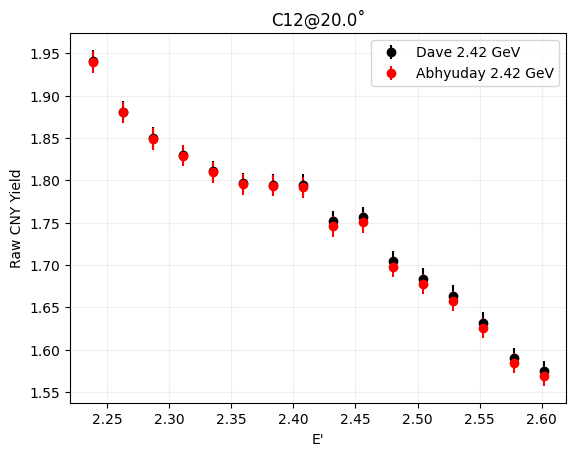

In [168]:
for i in range(len(delta_bin_contents_2p42_ntg)):
    print(f'{i+1}\t{delta_bin_contents_2p42_ntg[i]:.3f}\t\t{delta_bin_errors_2p42_ntg[i]:.3f}')

# Data Yield (Dave)
data_yield_dave_2p42 = np.array([1.941, 1.881, 1.850, 1.830, 1.811, 1.797, 1.795, 1.795, 1.752, 1.757, 1.705, 1.684, 1.664, 1.632, 1.590, 1.575])

# Uncertainty (Dave)
uncertainty_dave_2p42 = np.array([0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012])

plt.errorbar(binned_eprime_bin_centers_2p42, data_yield_dave_2p42, yerr = uncertainty_dave_2p42, fmt = 'o', color = 'black', label = 'Dave 2.42 GeV')
plt.errorbar(binned_eprime_bin_centers_2p42, delta_bin_contents_2p42_ntg, yerr = delta_bin_errors_2p42_ntg, fmt = 'o', color = 'red', label = 'Abhyuday 2.42 GeV')
plt.xlabel('E\'')
plt.ylabel('Raw CNY Yield')
plt.title(f'{ntg}@{dang}˚')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'{folder}/rawyield_{ntg}_{dang}_df_{start_time:.0f}.pdf')

In [169]:
print(f'{ntg}')
for i in range(len(csb_frac_2p42_ntg)):
    print(f'Bin {i+1} has a content of {binned_eprime_bin_centers_2p42[i]:.3f} and a csb of {csb_frac_2p42_ntg[i]:.3f}')

C12
Bin 1 has a content of 2.239 and a csb of 0.047
Bin 2 has a content of 2.263 and a csb of 0.045
Bin 3 has a content of 2.287 and a csb of 0.042
Bin 4 has a content of 2.311 and a csb of 0.040
Bin 5 has a content of 2.335 and a csb of 0.038
Bin 6 has a content of 2.359 and a csb of 0.036
Bin 7 has a content of 2.384 and a csb of 0.034
Bin 8 has a content of 2.408 and a csb of 0.032
Bin 9 has a content of 2.432 and a csb of 0.031
Bin 10 has a content of 2.456 and a csb of 0.029
Bin 11 has a content of 2.480 and a csb of 0.027
Bin 12 has a content of 2.505 and a csb of 0.026
Bin 13 has a content of 2.529 and a csb of 0.025
Bin 14 has a content of 2.553 and a csb of 0.023
Bin 15 has a content of 2.577 and a csb of 0.022
Bin 16 has a content of 2.601 and a csb of 0.021


Type for delta_bin_contents_2p42 <class 'numpy.float64'>
Type for prod_scale_2p42 <class 'float'>
Type for csb_contents_2p42 <class 'numpy.float64'>


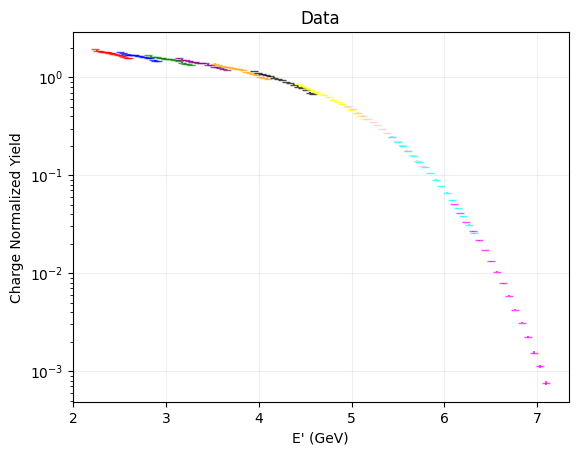

In [170]:
print("Type for delta_bin_contents_2p42", type(delta_bin_contents_2p42_ntg[0]))
print("Type for prod_scale_2p42", type(prod_scale_2p42_ntg))
print("Type for csb_contents_2p42", type(csb_frac_2p42_ntg[0]))

# Subtract the charge symmetric background fraction from the total yield
subtracted_bin_contents_2p42_ntg = delta_bin_contents_2p42_ntg * (1 - csb_frac_2p42_ntg)
subtracted_bin_contents_2p71_ntg = delta_bin_contents_2p71_ntg * (1 - csb_frac_2p71_ntg)
subtracted_bin_contents_3p04_ntg = delta_bin_contents_3p04_ntg * (1 - csb_frac_3p04_ntg)
subtracted_bin_contents_3p4_ntg = delta_bin_contents_3p4_ntg * (1 - csb_frac_3p4_ntg)
subtracted_bin_contents_3p81_ntg = delta_bin_contents_3p81_ntg * (1 - csb_frac_3p81_ntg)
subtracted_bin_contents_4p27_ntg = delta_bin_contents_4p27_ntg * (1 - csb_frac_4p27_ntg)
subtracted_bin_contents_4p78_ntg = delta_bin_contents_4p78_ntg * (1 - csb_frac_4p78_ntg)
subtracted_bin_contents_5p36_ntg = delta_bin_contents_5p36_ntg * (1 - csb_frac_5p36_ntg)
subtracted_bin_contents_5p878_ntg = delta_bin_contents_5p878_ntg * (1 - csb_frac_5p878_ntg)
subtracted_bin_contents_6p6_ntg = delta_bin_contents_6p6_ntg * (1 - csb_frac_6p6_ntg)

# Add the errors in quadrature
subtracted_bin_errors_2p42_ntg = np.sqrt(delta_bin_errors_2p42_ntg**2 + (csb_frac_2p42_ntg * prod_scale_2p42_ntg)**2)
subtracted_bin_errors_2p71_ntg = np.sqrt(delta_bin_errors_2p71_ntg**2 + (csb_frac_2p71_ntg * prod_scale_2p71_ntg)**2)
subtracted_bin_errors_3p04_ntg = np.sqrt(delta_bin_errors_3p04_ntg**2 + (csb_frac_3p04_ntg * prod_scale_3p04_ntg)**2)
subtracted_bin_errors_3p4_ntg = np.sqrt(delta_bin_errors_3p4_ntg**2 + (csb_frac_3p4_ntg * prod_scale_3p4_ntg)**2)
subtracted_bin_errors_3p81_ntg = np.sqrt(delta_bin_errors_3p81_ntg**2 + (csb_frac_3p81_ntg * prod_scale_3p81_ntg)**2)
subtracted_bin_errors_4p27_ntg = np.sqrt(delta_bin_errors_4p27_ntg**2 + (csb_frac_4p27_ntg * prod_scale_4p27_ntg)**2)
subtracted_bin_errors_4p78_ntg = np.sqrt(delta_bin_errors_4p78_ntg**2 + (csb_frac_4p78_ntg * prod_scale_4p78_ntg)**2)
subtracted_bin_errors_5p36_ntg = np.sqrt(delta_bin_errors_5p36_ntg**2 + (csb_frac_5p36_ntg * prod_scale_5p36_ntg)**2)
subtracted_bin_errors_5p878_ntg = np.sqrt(delta_bin_errors_5p878_ntg**2 + (csb_frac_5p878_ntg * prod_scale_5p878_ntg)**2)
subtracted_bin_errors_6p6_ntg = np.sqrt(delta_bin_errors_6p6_ntg**2 + (csb_frac_6p6_ntg * prod_scale_6p6_ntg)**2)

# fig refers to the entire canvas on which plots are drawn. ax refers to a single plot/subplot
fig, ax = plt.subplots()
ax.errorbar(binned_eprime_bin_centers_2p42, delta_bin_contents_2p42_ntg, yerr = subtracted_bin_errors_2p42_ntg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV')
ax.errorbar(binned_eprime_bin_centers_2p71, delta_bin_contents_2p71_ntg, yerr = subtracted_bin_errors_2p71_ntg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
ax.errorbar(binned_eprime_bin_centers_3p04, delta_bin_contents_3p04_ntg, yerr = subtracted_bin_errors_3p04_ntg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
ax.errorbar(binned_eprime_bin_centers_3p4, delta_bin_contents_3p4_ntg, yerr = subtracted_bin_errors_3p4_ntg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.4 GeV')
ax.errorbar(binned_eprime_bin_centers_3p81, delta_bin_contents_3p81_ntg, yerr = subtracted_bin_errors_3p81_ntg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.81 GeV')
ax.errorbar(binned_eprime_bin_centers_4p27, delta_bin_contents_4p27_ntg, yerr = subtracted_bin_errors_4p27_ntg, fmt = '_', color = 'black', alpha = 0.7, label = '4.27 GeV')
ax.errorbar(binned_eprime_bin_centers_4p78, delta_bin_contents_4p78_ntg, yerr = subtracted_bin_errors_4p78_ntg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.78 GeV')
ax.errorbar(binned_eprime_bin_centers_5p36, delta_bin_contents_5p36_ntg, yerr = subtracted_bin_errors_5p36_ntg, fmt = '_', color = 'pink', alpha = 0.7, label = '5.36 GeV')
ax.errorbar(binned_eprime_bin_centers_5p878, delta_bin_contents_5p878_ntg, yerr = subtracted_bin_errors_5p878_ntg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
ax.errorbar(binned_eprime_bin_centers_6p6, delta_bin_contents_6p6_ntg, yerr = subtracted_bin_errors_6p6_ntg, fmt = '_', color = 'magenta', alpha = 0.7, label = '6.6 GeV')
ax.set_ylabel('Charge Normalized Yield')
ax.set_xlabel('E\' (GeV)')
ax.set_title('Data')
ax.set_yscale('log')
ax.grid(alpha = 0.2)
# fig.savefig(f'{folder}/{nsimstring}_{dsimstring}_newyield.pdf')

In [171]:
# print(f"C = {C}", subtracted_bin_contents_2p42)
# kya = subtracted_bin_contents_4p27_ntg
for i in range(len(subtracted_bin_contents_4p27_ntg)):
    print(f"{i+1}\t{subtracted_bin_contents_4p27_ntg[i]:.3f}\t\t{subtracted_bin_errors_4p27_ntg[i]:.3f}")

1	1.154		0.003
2	1.103		0.003
3	1.071		0.003
4	1.047		0.003
5	1.020		0.003
6	0.995		0.003
7	0.968		0.003
8	0.936		0.003
9	0.903		0.003
10	0.872		0.003
11	0.845		0.003
12	0.804		0.003
13	0.773		0.003
14	0.738		0.003
15	0.699		0.003
16	0.677		0.003


<h1 align="center">SIMULATION WORK FOR NTG</h1>


Should be -8 and +8 -8.081670901474604 7.894445269387333


Text(0.5, 1.0, 'C12@20.0˚ Simulation')

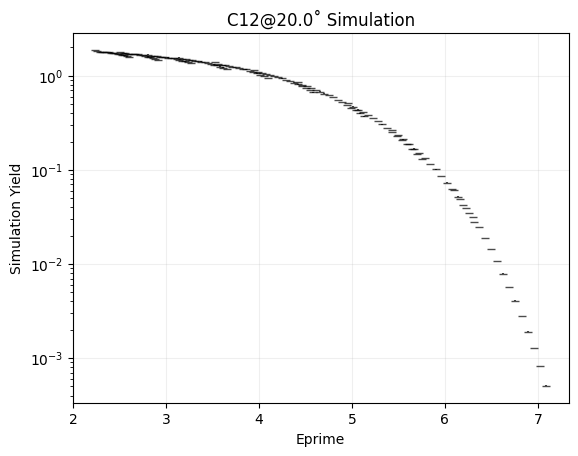

In [172]:
#Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor(f"/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_{nsimstring}22_hms.out")

Eprime_dict = {}
delta_dict = {}
xsec_array = {}
mc_scale = {}
thetadict = {}
ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
idang = int(dang)

for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # filepath = f"/Volumes/smriti/xem2/worksim/hms_mc_{nsimstring}_{idang}degm{mom_str}.root"
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{nsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdelta", "hsytar", "hsyptar", "hsxptar", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdelta"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdelta"]) <= 8) & \
            (np.abs(electrons["hsyptar"]) < 0.032) & \
            (np.abs(electrons["hsxptar"]) < 0.085) & \
            (electrons["stop_id"] == 0)

    # New delta correction
    # Perform the delta correction
    electrons["hsdelta"] = (0.990337 * electrons["hsdelta"]) - 0.00236077 * (electrons["hsdelta"]**2) + 0.000286814 * (electrons["hsdelta"]**3) + 2.09878E-6 * (electrons["hsdelta"]**4) - 2.48674E-6 * (electrons["hsdelta"]**5) + 1.8646E-7 * (electrons["hsdelta"]**6)

    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdelta"][mc_cut]
    hsyptar_cut = electrons["hsyptar"][mc_cut]
    hsxptar_cut = electrons["hsxptar"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut

    # Calculate E' and theta (in degrees)
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), -1.5)
    
    # Perform the interpolation
    points_ntg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))
    xsec_array[momentum] = griddata(points_ntg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section (V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation
    thetadict[momentum] = thetadeg

hsdelta_min = np.min(delta_dict[2.42])
hsdelta_max = np.max(delta_dict[2.42])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_num_bins = bin_per_mom
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, hsdelta_num_bins + 1)

#This function returns 2 arrays: bin counts (the counts in each bin taking weights into account) and bin edges (the edges of the bins)
bin_edges_delta_2p42 = np.histogram(delta_dict[2.42], weights = xsec_array[2.42] * mc_scale[2.42], bins = hsdelta_binedges)[1]
bin_edges_delta_2p71 = np.histogram(delta_dict[2.71], weights = xsec_array[2.71] * mc_scale[2.71], bins = hsdelta_binedges)[1]
bin_edges_delta_3p04 = np.histogram(delta_dict[3.04], weights = xsec_array[3.04] * mc_scale[3.04], bins = hsdelta_binedges)[1]
bin_edges_delta_3p4 = np.histogram(delta_dict[3.4], weights = xsec_array[3.4] * mc_scale[3.4], bins = hsdelta_binedges)[1]
bin_edges_delta_3p81 = np.histogram(delta_dict[3.81], weights = xsec_array[3.81] * mc_scale[3.81], bins = hsdelta_binedges)[1]
bin_edges_delta_4p27 = np.histogram(delta_dict[4.27], weights = xsec_array[4.27] * mc_scale[4.27], bins = hsdelta_binedges)[1]
bin_edges_delta_4p78 = np.histogram(delta_dict[4.78], weights = xsec_array[4.78] * mc_scale[4.78], bins = hsdelta_binedges)[1]
bin_edges_delta_5p36 = np.histogram(delta_dict[5.36], weights = xsec_array[5.36] * mc_scale[5.36], bins = hsdelta_binedges)[1]
bin_edges_delta_5p878 = np.histogram(delta_dict[5.878], weights = xsec_array[5.878] * mc_scale[5.878], bins = hsdelta_binedges)[1]
bin_edges_delta_6p6 = np.histogram(delta_dict[6.6], weights = xsec_array[6.6] * mc_scale[6.6], bins = hsdelta_binedges)[1]

bin_counts_eprime_2p42_mc_ntg, bin_errors_eprime_2p42_mc_ntg = mchist_from_array(delta_dict[2.42], xsec_array[2.42] * mc_scale[2.42] * ytar_weight[2.42] * jacobian_weight[2.42], hsdelta_binedges)
bin_counts_eprime_2p71_mc_ntg, bin_errors_eprime_2p71_mc_ntg = mchist_from_array(delta_dict[2.71], xsec_array[2.71] * mc_scale[2.71] * ytar_weight[2.71] * jacobian_weight[2.71], hsdelta_binedges)
bin_counts_eprime_3p04_mc_ntg, bin_errors_eprime_3p04_mc_ntg = mchist_from_array(delta_dict[3.04], xsec_array[3.04] * mc_scale[3.04] * ytar_weight[3.04] * jacobian_weight[3.04], hsdelta_binedges)
bin_counts_eprime_3p4_mc_ntg, bin_errors_eprime_3p4_mc_ntg = mchist_from_array(delta_dict[3.4], xsec_array[3.4] * mc_scale[3.4] * ytar_weight[3.4] * jacobian_weight[3.4], hsdelta_binedges)
bin_counts_eprime_3p81_mc_ntg, bin_errors_eprime_3p81_mc_ntg = mchist_from_array(delta_dict[3.81], xsec_array[3.81] * mc_scale[3.81] * ytar_weight[3.81] * jacobian_weight[3.81], hsdelta_binedges)
bin_counts_eprime_4p27_mc_ntg, bin_errors_eprime_4p27_mc_ntg = mchist_from_array(delta_dict[4.27], xsec_array[4.27] * mc_scale[4.27] * ytar_weight[4.27] * jacobian_weight[4.27], hsdelta_binedges)
bin_counts_eprime_4p78_mc_ntg, bin_errors_eprime_4p78_mc_ntg = mchist_from_array(delta_dict[4.78], xsec_array[4.78] * mc_scale[4.78] * ytar_weight[4.78] * jacobian_weight[4.78], hsdelta_binedges)
bin_counts_eprime_5p36_mc_ntg, bin_errors_eprime_5p36_mc_ntg = mchist_from_array(delta_dict[5.36], xsec_array[5.36] * mc_scale[5.36] * ytar_weight[5.36] * jacobian_weight[5.36], hsdelta_binedges)
bin_counts_eprime_5p878_mc_ntg, bin_errors_eprime_5p878_mc_ntg = mchist_from_array(delta_dict[5.878], xsec_array[5.878] * mc_scale[5.878] * ytar_weight[5.878] * jacobian_weight[5.878], hsdelta_binedges)
bin_counts_eprime_6p6_mc_ntg, bin_errors_eprime_6p6_mc_ntg = mchist_from_array(delta_dict[6.6], xsec_array[6.6] * mc_scale[6.6] * ytar_weight[6.6] * jacobian_weight[6.6], hsdelta_binedges)

bin_centers_delta_2p42 = (bin_edges_delta_2p42[:-1] + bin_edges_delta_2p42[1:]) / 2
bin_centers_delta_2p71 = (bin_edges_delta_2p71[:-1] + bin_edges_delta_2p71[1:]) / 2
bin_centers_delta_3p04 = (bin_edges_delta_3p04[:-1] + bin_edges_delta_3p04[1:]) / 2
bin_centers_delta_3p4 = (bin_edges_delta_3p4[:-1] + bin_edges_delta_3p4[1:]) / 2
bin_centers_delta_3p81 = (bin_edges_delta_3p81[:-1] + bin_edges_delta_3p81[1:]) / 2
bin_centers_delta_4p27 = (bin_edges_delta_4p27[:-1] + bin_edges_delta_4p27[1:]) / 2
bin_centers_delta_4p78 = (bin_edges_delta_4p78[:-1] + bin_edges_delta_4p78[1:]) / 2
bin_centers_delta_5p36 = (bin_edges_delta_5p36[:-1] + bin_edges_delta_5p36[1:]) / 2
bin_centers_delta_5p878 = (bin_edges_delta_5p878[:-1] + bin_edges_delta_5p878[1:]) / 2
bin_centers_delta_6p6 = (bin_edges_delta_6p6[:-1] + bin_edges_delta_6p6[1:]) / 2

binned_eprime_bin_centers_2p42_mc_ntg = 2.42 * (1 + 0.01 * bin_centers_delta_2p42)
binned_eprime_bin_centers_2p71_mc_ntg = 2.71 * (1 + 0.01 * bin_centers_delta_2p71)
binned_eprime_bin_centers_3p04_mc_ntg = 3.04 * (1 + 0.01 * bin_centers_delta_3p04)
binned_eprime_bin_centers_3p4_mc_ntg = 3.4 * (1 + 0.01 * bin_centers_delta_3p4)
binned_eprime_bin_centers_3p81_mc_ntg = 3.81 * (1 + 0.01 * bin_centers_delta_3p81)
binned_eprime_bin_centers_4p27_mc_ntg = 4.27 * (1 + 0.01 * bin_centers_delta_4p27)
binned_eprime_bin_centers_4p78_mc_ntg = 4.78 * (1 + 0.01 * bin_centers_delta_4p78)
binned_eprime_bin_centers_5p36_mc_ntg = 5.36 * (1 + 0.01 * bin_centers_delta_5p36)
binned_eprime_bin_centers_5p878_mc_ntg = 5.878 * (1 + 0.01 * bin_centers_delta_5p878)
binned_eprime_bin_centers_6p6_mc_ntg = 6.6 * (1 + 0.01 * bin_centers_delta_6p6)

#Plotting the histogram with error bars
fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_2p42_mc_ntg, bin_counts_eprime_2p42_mc_ntg, yerr = bin_errors_eprime_2p42_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p71_mc_ntg, bin_counts_eprime_2p71_mc_ntg, yerr = bin_errors_eprime_2p71_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p04_mc_ntg, bin_counts_eprime_3p04_mc_ntg, yerr = bin_errors_eprime_3p04_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.04 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p4_mc_ntg, bin_counts_eprime_3p4_mc_ntg, yerr = bin_errors_eprime_3p4_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.4 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p81_mc_ntg, bin_counts_eprime_3p81_mc_ntg, yerr = bin_errors_eprime_3p81_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.81 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p27_mc_ntg, bin_counts_eprime_4p27_mc_ntg, yerr = bin_errors_eprime_4p27_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.27 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p78_mc_ntg, bin_counts_eprime_4p78_mc_ntg, yerr = bin_errors_eprime_4p78_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.78 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p36_mc_ntg, bin_counts_eprime_5p36_mc_ntg, yerr = bin_errors_eprime_5p36_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.36 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p878_mc_ntg, bin_counts_eprime_5p878_mc_ntg, yerr = bin_errors_eprime_5p878_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.878 GeV')
ax2.errorbar(binned_eprime_bin_centers_6p6_mc_ntg, bin_counts_eprime_6p6_mc_ntg, yerr = bin_errors_eprime_6p6_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 6.6 GeV')
ax2.grid(alpha = 0.2)
ax2.set_xlabel('Eprime')
ax2.set_ylabel('Simulation Yield')
ax2.set_yscale('log')
# ax.legend() 
ax2.set_title(f'{ntg}@{dang}˚ Simulation')
# fig2.savefig(f'{folder}/eprime_{ntg}_{dang}_{start_time:.0f}.pdf')

<h2 style="text-align: center; color: #ff6656;"> Raw MC yield </h2>

1	1.874		0.005
2	1.837		0.005
3	1.800		0.005
4	1.798		0.005
5	1.791		0.005
6	1.780		0.005
7	1.778		0.005
8	1.764		0.005
9	1.749		0.005
10	1.742		0.005
11	1.712		0.005
12	1.688		0.005
13	1.675		0.005
14	1.641		0.005
15	1.604		0.005
16	1.581		0.005


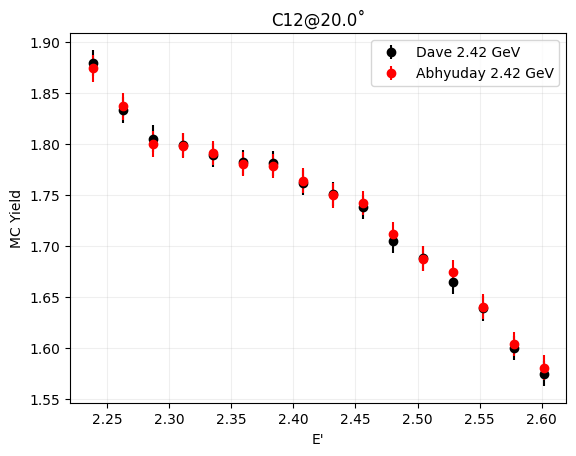

In [201]:
for i in range(len(bin_counts_eprime_2p42_mc_ntg)):
    print(f"{i+1}\t{bin_counts_eprime_2p42_mc_ntg[i]:.3f}\t\t{bin_errors_eprime_2p42_mc_ntg[i]:.3f}")

# Yield (Dave)
yield_data_dave_2p42_mc = np.array([1.879, 1.833, 1.805, 1.799, 1.789, 1.782, 1.781, 1.762, 1.751, 1.738, 1.705, 1.688, 1.665, 1.639, 1.600, 1.575])

# Yield without delta correction at 2.42 GeV
yield_without_delta = np.array([1.893, 1.881, 1.855, 1.843, 1.822, 1.800, 1.785, 1.757, 1.736, 1.721, 1.685, 1.667, 1.652, 1.624, 1.593, 1.578])

# Uncertainty (Dave)
uncertainty_data_dave_mc = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004])

plt.errorbar(binned_eprime_bin_centers_2p42, yield_data_dave_2p42_mc, yerr = uncertainty_dave_2p42, fmt = 'o', color = 'black', label = 'Dave 2.42 GeV')
plt.errorbar(binned_eprime_bin_centers_2p42, bin_counts_eprime_2p42_mc_ntg, yerr = uncertainty_dave_2p42, fmt = 'o', color = 'red', label = 'Abhyuday 2.42 GeV')
# plt.errorbar(binned_eprime_bin_centers_2p42, yield_without_delta, yerr = uncertainty_dave_2p42, fmt = 'o', color = 'purple', label = 'Abhyuday without delta correction')
plt.xlabel('E\'')
plt.ylabel('MC Yield')
plt.title(f'{ntg}@{dang}˚')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'{folder}/rawyield_{ntg}_{dang}_mc_{start_time + time.time():.0f}.pdf')

# Making theta acceptance plots

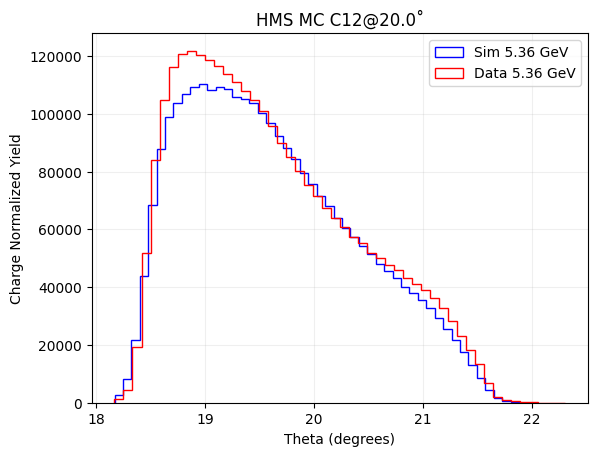

In [174]:
plt.hist(thetadict[5.36], bins = 50, weights = (xsec_array[5.36] * mc_scale[5.36]) / prod_scale_5p36_ntg, histtype = 'step', color = 'blue', label = 'Sim 5.36 GeV')
plt.hist(theta_dict[5.36], bins = 50, histtype = 'step', color = 'red', label = 'Data 5.36 GeV')
plt.xlabel('Theta (degrees)')
plt.ylabel('Charge Normalized Yield')
plt.title(f'HMS MC {ntg}@{dang}˚')
plt.grid(alpha = 0.2)
# plt.yscale('log')
plt.legend()
# plt.savefig(f'{folder}/theta_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR NTG</h1>


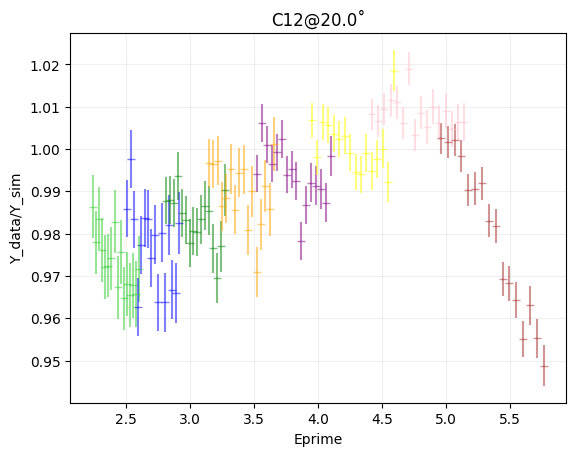

In [175]:
ratio_eprime_2p42_ntg = subtracted_bin_contents_2p42_ntg / bin_counts_eprime_2p42_mc_ntg
ratio_eprime_2p71_ntg = subtracted_bin_contents_2p71_ntg / bin_counts_eprime_2p71_mc_ntg
ratio_eprime_3p04_ntg = subtracted_bin_contents_3p04_ntg / bin_counts_eprime_3p04_mc_ntg
ratio_eprime_3p4_ntg = subtracted_bin_contents_3p4_ntg / bin_counts_eprime_3p4_mc_ntg
ratio_eprime_3p81_ntg = subtracted_bin_contents_3p81_ntg / bin_counts_eprime_3p81_mc_ntg
ratio_eprime_4p27_ntg = subtracted_bin_contents_4p27_ntg / bin_counts_eprime_4p27_mc_ntg
ratio_eprime_4p78_ntg = subtracted_bin_contents_4p78_ntg / bin_counts_eprime_4p78_mc_ntg
ratio_eprime_5p36_ntg = subtracted_bin_contents_5p36_ntg / bin_counts_eprime_5p36_mc_ntg
ratio_eprime_5p878_ntg = subtracted_bin_contents_5p878_ntg / bin_counts_eprime_5p878_mc_ntg
ratio_eprime_6p6_ntg = subtracted_bin_contents_6p6_ntg / bin_counts_eprime_6p6_mc_ntg

# Add errors in quadrature. First is data and second is MC
ratio_errors_2p42_ntg = ratio_eprime_2p42_ntg * np.sqrt((subtracted_bin_errors_2p42_ntg / subtracted_bin_contents_2p42_ntg)**2 + (bin_errors_eprime_2p42_mc_ntg / bin_counts_eprime_2p42_mc_ntg)**2)
ratio_errors_2p71_ntg = ratio_eprime_2p71_ntg * np.sqrt((subtracted_bin_errors_2p71_ntg / subtracted_bin_contents_2p71_ntg)**2 + (bin_errors_eprime_2p71_mc_ntg / bin_counts_eprime_2p71_mc_ntg)**2)
ratio_errors_3p04_ntg = ratio_eprime_3p04_ntg * np.sqrt((subtracted_bin_errors_3p04_ntg / subtracted_bin_contents_3p04_ntg)**2 + (bin_errors_eprime_3p04_mc_ntg / bin_counts_eprime_3p04_mc_ntg)**2)
ratio_errors_3p4_ntg = ratio_eprime_3p4_ntg * np.sqrt((subtracted_bin_errors_3p4_ntg / subtracted_bin_contents_3p4_ntg)**2 + (bin_errors_eprime_3p4_mc_ntg / bin_counts_eprime_3p4_mc_ntg)**2)
ratio_errors_3p81_ntg = ratio_eprime_3p81_ntg * np.sqrt((subtracted_bin_errors_3p81_ntg / subtracted_bin_contents_3p81_ntg)**2 + (bin_errors_eprime_3p81_mc_ntg / bin_counts_eprime_3p81_mc_ntg)**2)
ratio_errors_4p27_ntg = ratio_eprime_4p27_ntg * np.sqrt((subtracted_bin_errors_4p27_ntg / subtracted_bin_contents_4p27_ntg)**2 + (bin_errors_eprime_4p27_mc_ntg / bin_counts_eprime_4p27_mc_ntg)**2)
ratio_errors_4p78_ntg = ratio_eprime_4p78_ntg * np.sqrt((subtracted_bin_errors_4p78_ntg / subtracted_bin_contents_4p78_ntg)**2 + (bin_errors_eprime_4p78_mc_ntg / bin_counts_eprime_4p78_mc_ntg)**2)
ratio_errors_5p36_ntg = ratio_eprime_5p36_ntg * np.sqrt((subtracted_bin_errors_5p36_ntg / subtracted_bin_contents_5p36_ntg)**2 + (bin_errors_eprime_5p36_mc_ntg / bin_counts_eprime_5p36_mc_ntg)**2)
ratio_errors_5p878_ntg = ratio_eprime_5p878_ntg * np.sqrt((subtracted_bin_errors_5p878_ntg / subtracted_bin_contents_5p878_ntg)**2 + (bin_errors_eprime_5p878_mc_ntg / bin_counts_eprime_5p878_mc_ntg)**2)
ratio_errors_6p6_ntg = ratio_eprime_6p6_ntg * np.sqrt((subtracted_bin_errors_6p6_ntg / subtracted_bin_contents_6p6_ntg)**2 + (bin_errors_eprime_6p6_mc_ntg / bin_counts_eprime_6p6_mc_ntg)**2)

fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_ntg, yerr = ratio_errors_2p42_ntg, fmt = '_', alpha = 0.5, color = 'limegreen', label = '2.42 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p71, ratio_eprime_2p71_ntg, yerr = ratio_errors_2p71_ntg, fmt = '_', alpha = 0.5, color = 'blue', label = '2.71 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p04, ratio_eprime_3p04_ntg, yerr = ratio_errors_3p04_ntg, fmt = '_', alpha = 0.5, color = 'green', label = '3.04 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p4, ratio_eprime_3p4_ntg, yerr = ratio_errors_3p4_ntg, fmt = '_', alpha = 0.5, color = 'orange', label = '3.4 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p81, ratio_eprime_3p81_ntg, yerr = ratio_errors_3p81_ntg, fmt = '_', alpha = 0.5, color = 'purple', label = '3.81 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p27, ratio_eprime_4p27_ntg, yerr = ratio_errors_4p27_ntg, fmt = '_', alpha = 0.5, color = 'yellow', label = '4.27 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p78, ratio_eprime_4p78_ntg, yerr = ratio_errors_4p78_ntg, fmt = '_', alpha = 0.5, color = 'pink', label = '4.78 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p36, ratio_eprime_5p36_ntg, yerr = ratio_errors_5p36_ntg, fmt = '_', alpha = 0.5, color = 'brown', label = '5.36 GeV')
# ax2.errorbar(binned_eprime_bin_centers_5p878, ratio_eprime_5p878_ntg, yerr = ratio_errors_5p878_ntg, fmt = '_', alpha = 0.5, color = 'cyan', label = '5.878 GeV')
# ax2.errorbar(binned_eprime_bin_centers_6p6, ratio_eprime_6p6_ntg, yerr = ratio_errors_6p6_ntg, fmt = '_', alpha = 0.5, color = 'red', label = '6.6 GeV')
ax2.set_xlabel('Eprime')
ax2.set_ylabel('Y_data/Y_sim')
ax2.set_title(f'{ntg}@{dang}˚')
ax2.grid(alpha = 0.2)
# ax2.set_ylim(0.9, 1.1)
# fig2.savefig(f'{folder}/yieldratio_{ntg}_{dang}_{start_time:.0f}.pdf')

In [176]:
print(f'{ntg}')
with open(f'{folder}/yieldratio_{ntg}_{dang}_{start_time:.0f}.txt', 'w') as f:
    f.write(f'{ntg}_4p27\n')
    for i in range(len(ratio_eprime_4p27_ntg)):
        f.write(f"{i+1}\t{ratio_eprime_4p27_ntg[i]:.3f}\t\t{ratio_errors_4p27_ntg[i]:.3f}\n")

C12


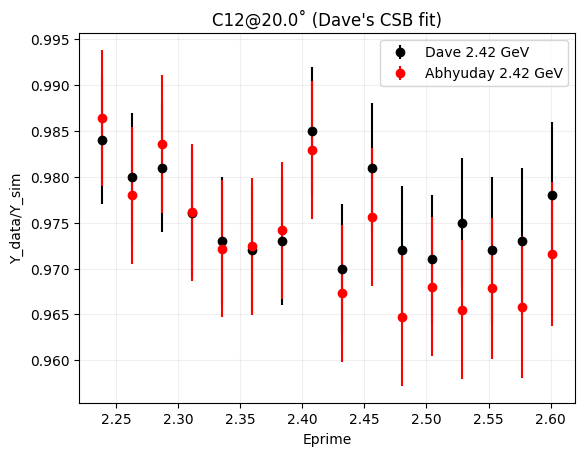

In [177]:
dave_ratio_4p27 = np.array([0.99816453456878662, 0.99380415678024292, 0.99239182472229004, 1.0018272399902344,
                   0.99890190362930298, 0.99960720539093018, 0.99893134832382202, 0.99649184942245483,
                   0.98841702938079834, 0.99451643228530884, 0.99902933835983276, 0.99311363697052002,
                   0.99312162399291992, 0.99911260604858398, 0.99976712465286255, 1.0138639211654663])
dave_errors_4p27 = np.array([4.0423306636512280E-003, 4.0819840505719185E-003, 4.1082035750150681E-003, 
                          4.1631651110947132E-003, 4.1717174462974072E-003, 4.1950307786464691E-003, 
                          4.2153126560151577E-003, 4.2397952638566494E-003, 4.2388522997498512E-003, 
                          4.3124477379024029E-003, 4.3687182478606701E-003, 4.4040773063898087E-003, 
                          4.4635627418756485E-003, 4.5576784759759903E-003, 4.6431175433099270E-003, 
                          4.7773635014891624E-003])
# Ratio (Dave)
ratio_data_dave_2p42 = np.array([0.984, 0.980, 0.981, 0.976, 0.973, 0.972, 0.973, 0.985, 0.970, 0.981, 0.972, 0.971, 0.975, 0.972, 0.973, 0.978])

# Uncertainty (Dave)
uncertainty_ratio_dave_2p42 = np.array([0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008])

plt.errorbar(binned_eprime_bin_centers_2p42, ratio_data_dave_2p42, yerr = uncertainty_ratio_dave_2p42, fmt = 'o', color = 'black', label = 'Dave 2.42 GeV')
plt.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_ntg, yerr = ratio_errors_2p42_ntg, fmt = 'o', color = 'red', label = 'Abhyuday 2.42 GeV')
plt.xlabel('Eprime')
plt.ylabel('Y_data/Y_sim')
plt.title(f'{ntg}@{dang}˚ (Dave\'s CSB fit)')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'{folder}/ratiocomp_{ntg}_{dang}_df_{start_time:.0f}.pdf')

In [178]:
print(ratio_errors_2p42_ntg[15])

0.007800617218644772


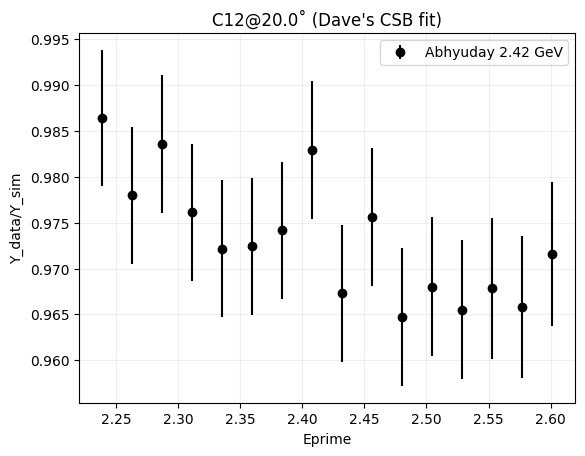

In [179]:
dave_ratio_2p42 = np.array([0.98526078462600708, 0.97875529527664185, 0.97642207145690918, 0.98097026348114014, 0.97095191478729248,
                              0.97210705280303955, 0.97559636831283569, 0.98575311899185181, 0.97676879167556763, 0.98417174816131592,
                              0.97512972354888916, 0.97255986928939819, 0.98179954290390015, 0.98151463270187378, 0.97047156095504761,
                              0.98677837848663330])
dave_errors_2p42 = np.array([5.9033972211182117E-003, 5.9418766759335995E-003, 5.9631448239088058E-003, 6.0031344182789326E-003, 
                              5.9517472982406616E-003, 5.9752850793302059E-003, 5.9879547916352749E-003, 6.0579776763916016E-003, 
                              6.0538845136761665E-003, 6.0986662283539772E-003, 6.0967230238020420E-003, 6.1322040855884552E-003, 
                              6.2318216077983379E-003, 6.2791756354272366E-003, 6.2703057192265987E-003, 6.3975830562412739E-003])
# plt.errorbar(binned_eprime_bin_centers_2p42, dave_ratio_2p42, fmt = 'o', yerr = dave_errors_2p42, color = 'red', label = 'Dave 2.42 GeV')
plt.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_ntg, fmt = 'o', yerr = ratio_errors_2p42_ntg, color = 'black', label = 'Abhyuday 2.42 GeV')
plt.xlabel('Eprime')
plt.ylabel('Y_data/Y_sim')
plt.title(f'{ntg}@{dang}˚ (Dave\'s CSB fit)')
plt.grid(alpha = 0.2)
plt.legend()
# plt.savefig(f'{folder}/ratiocomp_{ntg}_{dang}_df_{start_time-1:.0f}.pdf')

In [180]:
ratio_da = ratio_eprime_2p42_ntg / dave_ratio_2p42
c_err = np.sqrt(dave_errors_2p42**2 + ratio_errors_2p42_ntg**2)
# plt.errorbar(binned_eprime_bin_centers_2p42, ratio_da, fmt = 'o', color = 'blue', yerr = c_err)
# plt.grid(alpha = 0.2)
# plt.xlabel('Eprime')
# plt.ylabel('ABHYUDAY/DAVE')
# _ = plt.title(f'{ntg}@{dang}˚')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR NTG</h1>


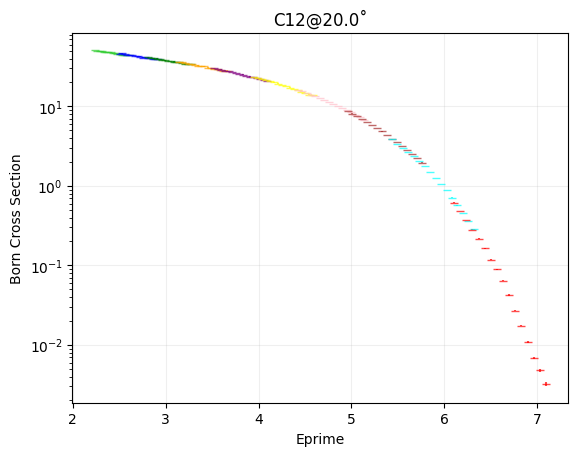

In [181]:
# Get points to interpolate based on angle and E'. Common for ntg and dtg
points_to_interpolate_2p42 = np.column_stack((binned_eprime_bin_centers_2p42, np.full(len(binned_eprime_bin_centers_2p42), dang)))
points_to_interpolate_2p71 = np.column_stack((binned_eprime_bin_centers_2p71, np.full(len(binned_eprime_bin_centers_2p71), dang)))
points_to_interpolate_3p04 = np.column_stack((binned_eprime_bin_centers_3p04, np.full(len(binned_eprime_bin_centers_3p04), dang)))
points_to_interpolate_3p4 = np.column_stack((binned_eprime_bin_centers_3p4, np.full(len(binned_eprime_bin_centers_3p4), dang)))
points_to_interpolate_3p81 = np.column_stack((binned_eprime_bin_centers_3p81, np.full(len(binned_eprime_bin_centers_3p81), dang)))
points_to_interpolate_4p27 = np.column_stack((binned_eprime_bin_centers_4p27, np.full(len(binned_eprime_bin_centers_4p27), dang)))
points_to_interpolate_4p78 = np.column_stack((binned_eprime_bin_centers_4p78, np.full(len(binned_eprime_bin_centers_4p78), dang)))
points_to_interpolate_5p36 = np.column_stack((binned_eprime_bin_centers_5p36, np.full(len(binned_eprime_bin_centers_5p36), dang)))
points_to_interpolate_5p878 = np.column_stack((binned_eprime_bin_centers_5p878, np.full(len(binned_eprime_bin_centers_5p878), dang)))
points_to_interpolate_6p6 = np.column_stack((binned_eprime_bin_centers_6p6, np.full(len(binned_eprime_bin_centers_6p6), dang)))

# Interpolate again to get model Born cross-section
born_xsec_array_2p42_ntg = griddata(points_ntg, V6, points_to_interpolate_2p42, method = 'linear') # points is just the whole stack of 2D array of [E', theta] from the table
born_xsec_array_2p71_ntg = griddata(points_ntg, V6, points_to_interpolate_2p71, method = 'linear')
born_xsec_array_3p04_ntg = griddata(points_ntg, V6, points_to_interpolate_3p04, method = 'linear')
born_xsec_array_3p4_ntg = griddata(points_ntg, V6, points_to_interpolate_3p4, method = 'linear')
born_xsec_array_3p81_ntg = griddata(points_ntg, V6, points_to_interpolate_3p81, method = 'linear')
born_xsec_array_4p27_ntg = griddata(points_ntg, V6, points_to_interpolate_4p27, method = 'linear')
born_xsec_array_4p78_ntg = griddata(points_ntg, V6, points_to_interpolate_4p78, method = 'linear')
born_xsec_array_5p36_ntg = griddata(points_ntg, V6, points_to_interpolate_5p36, method = 'linear')
born_xsec_array_5p878_ntg = griddata(points_ntg, V6, points_to_interpolate_5p878, method = 'linear')
born_xsec_array_6p6_ntg = griddata(points_ntg, V6, points_to_interpolate_6p6, method = 'linear')
# print("Length of born_xsec_array", len(born_xsec_array))

# Get the QE piece
qe_array_2p42_ntg = griddata(points_ntg, V8, points_to_interpolate_2p42, method = 'linear')
qe_array_2p71_ntg = griddata(points_ntg, V8, points_to_interpolate_2p71, method = 'linear')
qe_array_3p04_ntg = griddata(points_ntg, V8, points_to_interpolate_3p04, method = 'linear')
qe_array_3p4_ntg = griddata(points_ntg, V8, points_to_interpolate_3p4, method = 'linear')
qe_array_3p81_ntg = griddata(points_ntg, V8, points_to_interpolate_3p81, method = 'linear')
qe_array_4p27_ntg = griddata(points_ntg, V8, points_to_interpolate_4p27, method = 'linear')
qe_array_4p78_ntg = griddata(points_ntg, V8, points_to_interpolate_4p78, method = 'linear')
qe_array_5p36_ntg = griddata(points_ntg, V8, points_to_interpolate_5p36, method = 'linear')
qe_array_5p878_ntg = griddata(points_ntg, V8, points_to_interpolate_5p878, method = 'linear')
qe_array_6p6_ntg = griddata(points_ntg, V8, points_to_interpolate_6p6, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_2p42_ntg = griddata(points_ntg, V13, points_to_interpolate_2p42, method = 'linear')
ccf_2p71_ntg = griddata(points_ntg, V13, points_to_interpolate_2p71, method = 'linear')
ccf_3p04_ntg = griddata(points_ntg, V13, points_to_interpolate_3p04, method = 'linear')
ccf_3p4_ntg = griddata(points_ntg, V13, points_to_interpolate_3p4, method = 'linear')
ccf_3p81_ntg = griddata(points_ntg, V13, points_to_interpolate_3p81, method = 'linear')
ccf_4p27_ntg = griddata(points_ntg, V13, points_to_interpolate_4p27, method = 'linear')
ccf_4p78_ntg = griddata(points_ntg, V13, points_to_interpolate_4p78, method = 'linear')
ccf_5p36_ntg = griddata(points_ntg, V13, points_to_interpolate_5p36, method = 'linear')
ccf_5p878_ntg = griddata(points_ntg, V13, points_to_interpolate_5p878, method = 'linear')
ccf_6p6_ntg = griddata(points_ntg, V13, points_to_interpolate_6p6, method = 'linear')

fig3, ax3 = plt.subplots()
# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_2p42_ntg = ratio_eprime_2p42_ntg * born_xsec_array_2p42_ntg * ccf_2p42_ntg
born_cross_2p71_ntg = ratio_eprime_2p71_ntg * born_xsec_array_2p71_ntg * ccf_2p71_ntg
born_cross_3p04_ntg = ratio_eprime_3p04_ntg * born_xsec_array_3p04_ntg * ccf_3p04_ntg
born_cross_3p4_ntg= ratio_eprime_3p4_ntg * born_xsec_array_3p4_ntg * ccf_3p4_ntg
born_cross_3p81_ntg = ratio_eprime_3p81_ntg * born_xsec_array_3p81_ntg * ccf_3p81_ntg
born_cross_4p27_ntg = ratio_eprime_4p27_ntg * born_xsec_array_4p27_ntg * ccf_4p27_ntg
born_cross_4p78_ntg = ratio_eprime_4p78_ntg * born_xsec_array_4p78_ntg * ccf_4p78_ntg
born_cross_5p36_ntg = ratio_eprime_5p36_ntg * born_xsec_array_5p36_ntg * ccf_5p36_ntg
born_cross_5p878_ntg = ratio_eprime_5p878_ntg * born_xsec_array_5p878_ntg * ccf_5p878_ntg
born_cross_6p6_ntg= ratio_eprime_6p6_ntg * born_xsec_array_6p6_ntg * ccf_6p6_ntg

# print("Length of born_cross", len(born_cross))
# print("Born cross section", born_cross)
born_errors_2p42_ntg = born_cross_2p42_ntg * ratio_errors_2p42_ntg
born_errors_2p71_ntg = born_cross_2p71_ntg * ratio_errors_2p71_ntg
born_errors_3p04_ntg = born_cross_3p04_ntg * ratio_errors_3p04_ntg
born_errors_3p4_ntg = born_cross_3p4_ntg * ratio_errors_3p4_ntg
born_errors_3p81_ntg = born_cross_3p81_ntg * ratio_errors_3p81_ntg
born_errors_4p27_ntg = born_cross_4p27_ntg * ratio_errors_4p27_ntg
born_errors_4p78_ntg = born_cross_4p78_ntg * ratio_errors_4p78_ntg
born_errors_5p36_ntg = born_cross_5p36_ntg * ratio_errors_5p36_ntg
born_errors_5p878_ntg = born_cross_5p878_ntg * ratio_errors_5p878_ntg
born_errors_6p6_ntg = born_cross_6p6_ntg * ratio_errors_6p6_ntg

ax3.errorbar(binned_eprime_bin_centers_2p42, born_cross_2p42_ntg, yerr = born_errors_2p42_ntg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p71, born_cross_2p71_ntg, yerr = born_errors_2p71_ntg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p04, born_cross_3p04_ntg, yerr = born_errors_3p04_ntg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p4, born_cross_3p4_ntg, yerr = born_errors_3p4_ntg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p81, born_cross_3p81_ntg, yerr = born_errors_3p81_ntg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p27, born_cross_4p27_ntg, yerr = born_errors_4p27_ntg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p78, born_cross_4p78_ntg, yerr = born_errors_4p78_ntg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p36, born_cross_5p36_ntg, yerr = born_errors_5p36_ntg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p878, born_cross_5p878_ntg, yerr = born_errors_5p878_ntg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax3.errorbar(binned_eprime_bin_centers_6p6, born_cross_6p6_ntg, yerr = born_errors_6p6_ntg, fmt = '_', alpha = 0.7, color = 'red', label = '6.6 GeV')
ax3.set_xlabel('Eprime')
ax3.set_ylabel('Born Cross Section')
ax3.set_title(f'{ntg}@{dang}˚')
ax3.set_yscale('log')
#ax3.legend()
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/xsec_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA WORK FOR DUMMY TARGET</h1>


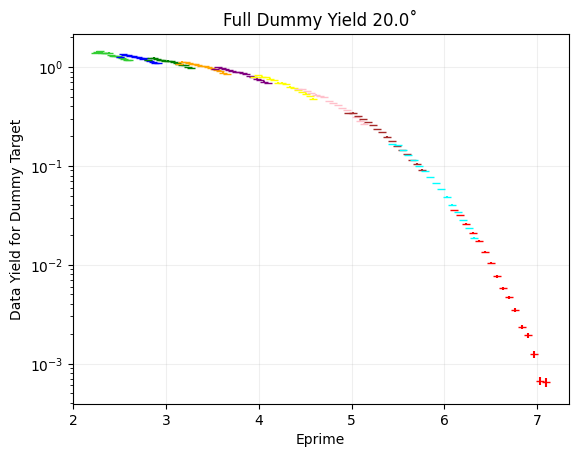

In [182]:
Z, A = 13, 27 # Target
Eu = 0.19535 # Ratio of upstream dummy to target cell thickness
Ed = 0.23924 # Ratio of downstream dummy to target cell thickness
ytar_hist = {}

for momentum in dmom:
    # Get the runs where data for Dummy target was taken
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in Dummy_dict[momentum]]
    # Grab relevant bracnhes. ytar needed for upstream/downstream differentiation
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_gtr_y']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]
    y_cut = electrons['H_gtr_y'][data_cut]

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts)/np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)
    ytar_hist[momentum] = np.array(y_cut)

dummy_eprime_bin_contents_2p42, dummy_eprime_bin_errors_2p42 = datahist_from_array(delta_hist[2.42], 2.42, hsdelta_binedges, ald)
dummy_eprime_bin_contents_2p71, dummy_eprime_bin_errors_2p71 = datahist_from_array(delta_hist[2.71], 2.71, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p04, dummy_eprime_bin_errors_3p04 = datahist_from_array(delta_hist[3.04], 3.04, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p4, dummy_eprime_bin_errors_3p4 = datahist_from_array(delta_hist[3.4], 3.4, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p81, dummy_eprime_bin_errors_3p81 = datahist_from_array(delta_hist[3.81], 3.81, hsdelta_binedges, ald)
dummy_eprime_bin_contents_4p27, dummy_eprime_bin_errors_4p27 = datahist_from_array(delta_hist[4.27], 4.27, hsdelta_binedges, ald)
dummy_eprime_bin_contents_4p78, dummy_eprime_bin_errors_4p78 = datahist_from_array(delta_hist[4.78], 4.78, hsdelta_binedges, ald)
dummy_eprime_bin_contents_5p36, dummy_eprime_bin_errors_5p36 = datahist_from_array(delta_hist[5.36], 5.36, hsdelta_binedges, ald)
dummy_eprime_bin_contents_5p878, dummy_eprime_bin_errors_5p878 = datahist_from_array(delta_hist[5.878], 5.878, hsdelta_binedges, ald)
dummy_eprime_bin_contents_6p6, dummy_eprime_bin_errors_6p6 = datahist_from_array(delta_hist[6.6], 6.6, hsdelta_binedges, ald)

plt.errorbar(binned_eprime_bin_centers_2p42, dummy_eprime_bin_contents_2p42, yerr = dummy_eprime_bin_errors_2p42, fmt = '_', label = '2.42 GeV', color = 'limegreen')
plt.errorbar(binned_eprime_bin_centers_2p71, dummy_eprime_bin_contents_2p71, yerr = dummy_eprime_bin_errors_2p71, fmt = '_', label = '2.71 GeV', color = 'blue')
plt.errorbar(binned_eprime_bin_centers_3p04, dummy_eprime_bin_contents_3p04, yerr = dummy_eprime_bin_errors_3p04, fmt = '_', label = '3.04 GeV', color = 'green')
plt.errorbar(binned_eprime_bin_centers_3p4, dummy_eprime_bin_contents_3p4, yerr = dummy_eprime_bin_errors_3p4, fmt = '_', label = '3.4 GeV', color = 'orange')
plt.errorbar(binned_eprime_bin_centers_3p81, dummy_eprime_bin_contents_3p81, yerr = dummy_eprime_bin_errors_3p81, fmt = '_', label = '3.81 GeV', color = 'purple')
plt.errorbar(binned_eprime_bin_centers_4p27, dummy_eprime_bin_contents_4p27, yerr = dummy_eprime_bin_errors_4p27, fmt = '_', label = '4.27 GeV', color = 'yellow')
plt.errorbar(binned_eprime_bin_centers_4p78, dummy_eprime_bin_contents_4p78, yerr = dummy_eprime_bin_errors_4p78, fmt = '_', label = '4.78 GeV', color = 'pink')
plt.errorbar(binned_eprime_bin_centers_5p36, dummy_eprime_bin_contents_5p36, yerr = dummy_eprime_bin_errors_5p36, fmt = '_', label = '5.36 GeV', color = 'brown')
plt.errorbar(binned_eprime_bin_centers_5p878, dummy_eprime_bin_contents_5p878, yerr = dummy_eprime_bin_errors_5p878, fmt = '_', label = '5.878 GeV', color = 'cyan')
plt.errorbar(binned_eprime_bin_centers_6p6, dummy_eprime_bin_contents_6p6, yerr = dummy_eprime_bin_errors_6p6, fmt = '_', label = '6.6 GeV', color = 'red')
plt.grid(alpha = 0.2)
plt.xlabel('Eprime')
plt.ylabel('Data Yield for Dummy Target')
plt.title(f'Full {ald} Yield {dang}˚')
plt.yscale('log')

In [183]:
Elist = []
for i in range(len(ytar_hist[2.42])):
    if ytar_hist[2.42][i] >= 0:
        Elist.append(0.2394)
    else:
        Elist.append(0.19535)
E = np.mean(Elist)
E

0.21655090798293722

-11.093774808244063 18.68427560784979


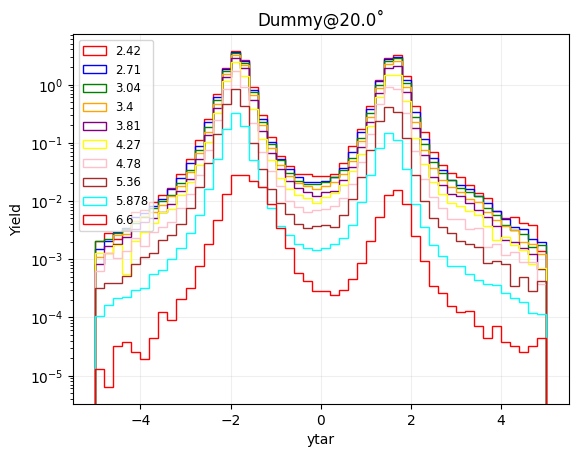

In [184]:
prod_scale_dummy_2p42 = read_report(2.42, ald)
prod_scale_dummy_2p71 = read_report(2.71, ald)
prod_scale_dummy_3p04 = read_report(3.04, ald)
prod_scale_dummy_3p4 = read_report(3.4, ald)
prod_scale_dummy_3p81 = read_report(3.81, ald)
prod_scale_dummy_4p27 = read_report(4.27, ald)
prod_scale_dummy_4p78 = read_report(4.78, ald)
prod_scale_dummy_5p36 = read_report(5.36, ald)
prod_scale_dummy_5p878 = read_report(5.878, ald)
prod_scale_dummy_6p6 = read_report(6.6, ald)

ytar_binedges = np.linspace(-5, 5, 51)

# Need to apply weights to go from counts to yield. full_like is used to create an array of the same shape as the input array (1st argument) with all elements set to a number (2nd argument)
plt.hist(ytar_hist[2.42], weights = np.full_like(ytar_hist[2.42], prod_scale_dummy_2p42), bins = 50, range = (-5, 5), histtype = 'step', color = 'red', label = '2.42')
plt.hist(ytar_hist[2.71], weights = np.full_like(ytar_hist[2.71], prod_scale_dummy_2p71), bins = 50, range = (-5, 5), histtype = 'step', color = 'blue', label = '2.71')
plt.hist(ytar_hist[3.04], weights = np.full_like(ytar_hist[3.04], prod_scale_dummy_3p04), bins = 50, range = (-5, 5), histtype = 'step', color = 'green', label = '3.04')
plt.hist(ytar_hist[3.4], weights = np.full_like(ytar_hist[3.4], prod_scale_dummy_3p4), bins = 50, range = (-5, 5), histtype = 'step', color = 'orange', label = '3.4')
plt.hist(ytar_hist[3.81], weights = np.full_like(ytar_hist[3.81], prod_scale_dummy_3p81), bins = 50, range = (-5, 5), histtype = 'step', color = 'purple', label = '3.81')
plt.hist(ytar_hist[4.27], weights = np.full_like(ytar_hist[4.27], prod_scale_dummy_4p27), bins = 50, range = (-5, 5), histtype = 'step', color = 'yellow', label = '4.27')
plt.hist(ytar_hist[4.78], weights = np.full_like(ytar_hist[4.78], prod_scale_dummy_4p78), bins = 50, range = (-5, 5), histtype = 'step', color = 'pink', label = '4.78')
plt.hist(ytar_hist[5.36], weights = np.full_like(ytar_hist[5.36], prod_scale_dummy_5p36), bins = 50, range = (-5, 5), histtype = 'step', color = 'brown', label = '5.36')
plt.hist(ytar_hist[5.878], weights = np.full_like(ytar_hist[5.878], prod_scale_dummy_5p878), bins = 50, range = (-5, 5), histtype = 'step', color = 'cyan', label = '5.878')
plt.hist(ytar_hist[6.6], weights = np.full_like(ytar_hist[6.6], prod_scale_dummy_6p6), bins = 50, range = (-5, 5), histtype = 'step', color = 'red', label = '6.6')
plt.xlabel('ytar')
plt.ylabel('Yield')
plt.title(f'{ald}@{dang}˚')
plt.grid(alpha = 0.2)
# plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1))
plt.legend(fontsize = 'small')
plt.yscale('log')
# plt.savefig(f'{folder}/ytar_{ald}_{dang}_{start_time:.0f}.pdf')
print(np.min(ytar_hist[2.42]), np.max(ytar_hist[2.42]))

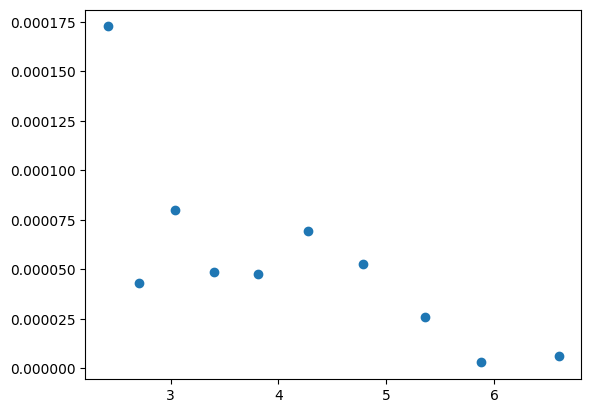

In [185]:
y = np.array([prod_scale_dummy_2p42, prod_scale_dummy_2p71, prod_scale_dummy_3p04, prod_scale_dummy_3p4, prod_scale_dummy_3p81, prod_scale_dummy_4p27, prod_scale_dummy_4p78, prod_scale_dummy_5p36, prod_scale_dummy_5p878, prod_scale_dummy_6p6])
plt.plot(dmom, y, 'o')

<h1 align="center">DATA WORK FOR DTG</h1>

In [186]:
# Kinematic variables
Z, A = target_info[dtg][0], target_info[dtg][1]  #Target
thick = target_info[dtg][2] # g/cm2. From Cameron's target sheet column 'R'
thick = thick * 0.996 # Cryo target contraction correction factor
lumin = thick * sim_charge / A * N_A / Q_E * 1e-39
ytar = {}
ytar_hist = {}
for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in LD2_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    delta_hist[momentum] = np.array(dp_cut)

eprime_bin_contents_2p42_dtg, eprime_bin_errors_2p42_dtg = datahist_from_array(delta_hist[2.42], 2.42, data_delta, dtg)
eprime_bin_contents_2p71_dtg, eprime_bin_errors_2p71_dtg = datahist_from_array(delta_hist[2.71], 2.71, data_delta, dtg)
eprime_bin_contents_3p04_dtg, eprime_bin_errors_3p04_dtg = datahist_from_array(delta_hist[3.04], 3.04, data_delta, dtg)
eprime_bin_contents_3p4_dtg, eprime_bin_errors_3p4_dtg = datahist_from_array(delta_hist[3.4], 3.4, data_delta, dtg)
eprime_bin_contents_3p81_dtg, eprime_bin_errors_3p81_dtg = datahist_from_array(delta_hist[3.81], 3.81, data_delta, dtg)
eprime_bin_contents_4p27_dtg, eprime_bin_errors_4p27_dtg = datahist_from_array(delta_hist[4.27], 4.27, data_delta, dtg)
eprime_bin_contents_4p78_dtg, eprime_bin_errors_4p78_dtg = datahist_from_array(delta_hist[4.78], 4.78, data_delta, dtg)
eprime_bin_contents_5p36_dtg, eprime_bin_errors_5p36_dtg = datahist_from_array(delta_hist[5.36], 5.36, data_delta, dtg)
eprime_bin_contents_5p878_dtg, eprime_bin_errors_5p878_dtg = datahist_from_array(delta_hist[5.878], 5.878, data_delta, dtg)
eprime_bin_contents_6p6_dtg, eprime_bin_errors_6p6_dtg = datahist_from_array(delta_hist[6.6], 6.6, data_delta, dtg)

<h2 style="text-align: center; color: silver">Subtracting CSB from full cryo target yield and dummy</h2>

देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं
देव के अंक हैं


Text(0.5, 1.0, 'Dummy Subtracted LD2 Data Yield')

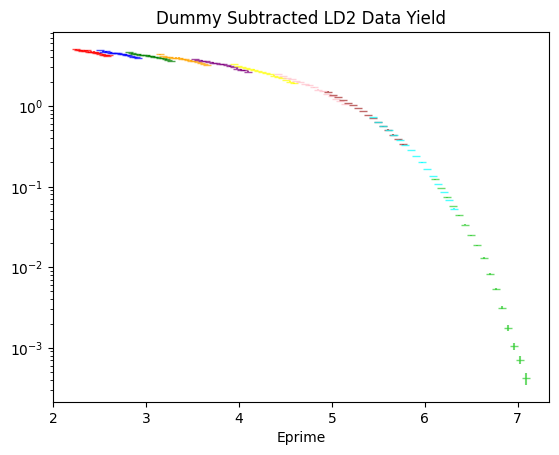

In [187]:
# Calculate the charge symmetric background fraction per bin for full cryo target
csb_frac_2p42_dtg = csb(binned_eprime_bin_centers_2p42, dtg, dang)
csb_frac_2p71_dtg = csb(binned_eprime_bin_centers_2p71, dtg, dang)
csb_frac_3p04_dtg = csb(binned_eprime_bin_centers_3p04, dtg, dang)
csb_frac_3p4_dtg = csb(binned_eprime_bin_centers_3p4, dtg, dang)
csb_frac_3p81_dtg = csb(binned_eprime_bin_centers_3p81, dtg, dang)
csb_frac_4p27_dtg = csb(binned_eprime_bin_centers_4p27, dtg, dang)
csb_frac_4p78_dtg = csb(binned_eprime_bin_centers_4p78, dtg, dang)
csb_frac_5p36_dtg = csb(binned_eprime_bin_centers_5p36, dtg, dang)
csb_frac_5p878_dtg = csb(binned_eprime_bin_centers_5p878, dtg, dang)
csb_frac_6p6_dtg = csb(binned_eprime_bin_centers_6p6, dtg, dang)

# Calculate the charge symmetric background fraction per bin for dummy target
csb_frac_2p42_ald = csb(binned_eprime_bin_centers_2p42, ald, dang)
csb_frac_2p71_ald = csb(binned_eprime_bin_centers_2p71, ald, dang)
csb_frac_3p04_ald = csb(binned_eprime_bin_centers_3p04, ald, dang)
csb_frac_3p4_ald = csb(binned_eprime_bin_centers_3p4, ald, dang)
csb_frac_3p81_ald = csb(binned_eprime_bin_centers_3p81, ald, dang)
csb_frac_4p27_ald = csb(binned_eprime_bin_centers_4p27, ald, dang)
csb_frac_4p78_ald = csb(binned_eprime_bin_centers_4p78, ald, dang)
csb_frac_5p36_ald = csb(binned_eprime_bin_centers_5p36, ald, dang)
csb_frac_5p878_ald = csb(binned_eprime_bin_centers_5p878, ald, dang)
csb_frac_6p6_ald = csb(binned_eprime_bin_centers_6p6, ald, dang)

fig4, ax4 = plt.subplots()

# Perform CSB subtraction on dummy target
subtracted_bin_contents_2p42_ald = dummy_eprime_bin_contents_2p42 * (1 - csb_frac_2p42_ald)
subtracted_bin_contents_2p71_ald = dummy_eprime_bin_contents_2p71 * (1 - csb_frac_2p71_ald)
subtracted_bin_contents_3p04_ald = dummy_eprime_bin_contents_3p04 * (1 - csb_frac_3p04_ald)
subtracted_bin_contents_3p4_ald = dummy_eprime_bin_contents_3p4 * (1 - csb_frac_3p4_ald)
subtracted_bin_contents_3p81_ald = dummy_eprime_bin_contents_3p81 * (1 - csb_frac_3p81_ald)
subtracted_bin_contents_4p27_ald = dummy_eprime_bin_contents_4p27 * (1 - csb_frac_4p27_ald)
subtracted_bin_contents_4p78_ald = dummy_eprime_bin_contents_4p78 * (1 - csb_frac_4p78_ald)
subtracted_bin_contents_5p36_ald = dummy_eprime_bin_contents_5p36 * (1 - csb_frac_5p36_ald)
subtracted_bin_contents_5p878_ald = dummy_eprime_bin_contents_5p878 * (1 - csb_frac_5p878_ald)
subtracted_bin_contents_6p6_ald = dummy_eprime_bin_contents_6p6 * (1 - csb_frac_6p6_ald)

# Subtract the charge symmetric background fraction from the full cryo yield
subtracted_bin_contents_2p42_dtg = eprime_bin_contents_2p42_dtg * (1 - csb_frac_2p42_dtg)
subtracted_bin_contents_2p71_dtg = eprime_bin_contents_2p71_dtg * (1 - csb_frac_2p71_dtg)
subtracted_bin_contents_3p04_dtg = eprime_bin_contents_3p04_dtg * (1 - csb_frac_3p04_dtg)
subtracted_bin_contents_3p4_dtg = eprime_bin_contents_3p4_dtg * (1 - csb_frac_3p4_dtg)
subtracted_bin_contents_3p81_dtg = eprime_bin_contents_3p81_dtg * (1 - csb_frac_3p81_dtg)
subtracted_bin_contents_4p27_dtg = eprime_bin_contents_4p27_dtg * (1 - csb_frac_4p27_dtg)
subtracted_bin_contents_4p78_dtg = eprime_bin_contents_4p78_dtg * (1 - csb_frac_4p78_dtg)
subtracted_bin_contents_5p36_dtg = eprime_bin_contents_5p36_dtg * (1 - csb_frac_5p36_dtg)
subtracted_bin_contents_5p878_dtg = eprime_bin_contents_5p878_dtg * (1 - csb_frac_5p878_dtg)
subtracted_bin_contents_6p6_dtg = eprime_bin_contents_6p6_dtg * (1 - csb_frac_6p6_dtg)

# Perform Dummy Subtraction
subtracted_bin_contents_2p42_dtg = subtracted_bin_contents_2p42_dtg - E * subtracted_bin_contents_2p42_ald
subtracted_bin_contents_2p71_dtg = subtracted_bin_contents_2p71_dtg - E * subtracted_bin_contents_2p71_ald
subtracted_bin_contents_3p04_dtg = subtracted_bin_contents_3p04_dtg - E * subtracted_bin_contents_3p04_ald
subtracted_bin_contents_3p4_dtg = subtracted_bin_contents_3p4_dtg - E * subtracted_bin_contents_3p4_ald
subtracted_bin_contents_3p81_dtg = subtracted_bin_contents_3p81_dtg - E * subtracted_bin_contents_3p81_ald
subtracted_bin_contents_4p27_dtg = subtracted_bin_contents_4p27_dtg - E * subtracted_bin_contents_4p27_ald
subtracted_bin_contents_4p78_dtg = subtracted_bin_contents_4p78_dtg - E * subtracted_bin_contents_4p78_ald
subtracted_bin_contents_5p36_dtg = subtracted_bin_contents_5p36_dtg - E * subtracted_bin_contents_5p36_ald
subtracted_bin_contents_5p878_dtg = subtracted_bin_contents_5p878_dtg - E * subtracted_bin_contents_5p878_ald
subtracted_bin_contents_6p6_dtg = subtracted_bin_contents_6p6_dtg - E * subtracted_bin_contents_6p6_ald

#Error Prpoagation
eprime_bin_errors_2p42_dtg = np.sqrt((eprime_bin_errors_2p42_dtg)**2 + (dummy_eprime_bin_errors_2p42)**2)
eprime_bin_errors_2p71_dtg = np.sqrt((eprime_bin_errors_2p71_dtg)**2 + (dummy_eprime_bin_errors_2p71)**2)
eprime_bin_errors_3p04_dtg = np.sqrt((eprime_bin_errors_3p04_dtg)**2 + (dummy_eprime_bin_errors_3p04)**2)
eprime_bin_errors_3p4_dtg = np.sqrt((eprime_bin_errors_3p4_dtg)**2 + (dummy_eprime_bin_errors_3p4)**2)
eprime_bin_errors_3p81_dtg = np.sqrt((eprime_bin_errors_3p81_dtg)**2 + (dummy_eprime_bin_errors_3p81)**2)
eprime_bin_errors_4p27_dtg = np.sqrt((eprime_bin_errors_4p27_dtg)**2 + (dummy_eprime_bin_errors_4p27)**2)
eprime_bin_errors_4p78_dtg = np.sqrt((eprime_bin_errors_4p78_dtg)**2 + (dummy_eprime_bin_errors_4p78)**2)
eprime_bin_errors_5p36_dtg = np.sqrt((eprime_bin_errors_5p36_dtg)**2 + (dummy_eprime_bin_errors_5p36)**2)
eprime_bin_errors_5p878_dtg = np.sqrt((eprime_bin_errors_5p878_dtg)**2 + (dummy_eprime_bin_errors_5p878)**2)
eprime_bin_errors_6p6_dtg = np.sqrt((eprime_bin_errors_6p6_dtg)**2 + (dummy_eprime_bin_errors_6p6)**2)

# Get the scaling factors to go from counts to yield
prod_scale_2p42_dtg = read_report(2.42, dtg)
prod_scale_2p71_dtg = read_report(2.71, dtg)
prod_scale_3p04_dtg = read_report(3.04, dtg)
prod_scale_3p4_dtg = read_report(3.4, dtg)
prod_scale_3p81_dtg = read_report(3.81, dtg)
prod_scale_4p27_dtg = read_report(4.27, dtg)
prod_scale_4p78_dtg = read_report(4.78, dtg)
prod_scale_5p36_dtg = read_report(5.36, dtg)
prod_scale_5p878_dtg = read_report(5.878, dtg)
prod_scale_6p6_dtg = read_report(6.6, dtg)

# csb_frac_2p42_dtg = 0
# csb_frac_2p71_dtg = 0
# csb_frac_3p04_dtg = 0
# csb_frac_3p4_dtg = 0
# csb_frac_3p81_dtg = 0
# csb_frac_4p27_dtg = 0
# csb_frac_4p78_dtg = 0
# csb_frac_5p36_dtg = 0
# csb_frac_5p878_dtg = 0
# csb_frac_6p6_dtg = 0

# Add errors in quadrature. What is uncertainty of csb_frac?
subtracted_bin_errors_2p42_dtg = np.sqrt(eprime_bin_errors_2p42_dtg**2 + (csb_frac_2p42_dtg * prod_scale_2p42_dtg)**2)
subtracted_bin_errors_2p71_dtg = np.sqrt(eprime_bin_errors_2p71_dtg**2 + (csb_frac_2p71_dtg * prod_scale_2p71_dtg)**2)
subtracted_bin_errors_3p04_dtg = np.sqrt(eprime_bin_errors_3p04_dtg**2 + (csb_frac_3p04_dtg * prod_scale_3p04_dtg)**2)
subtracted_bin_errors_3p4_dtg = np.sqrt(eprime_bin_errors_3p4_dtg**2 + (csb_frac_3p4_dtg * prod_scale_3p4_dtg)**2)
subtracted_bin_errors_3p81_dtg = np.sqrt(eprime_bin_errors_3p81_dtg**2 + (csb_frac_3p81_dtg * prod_scale_3p81_dtg)**2)
subtracted_bin_errors_4p27_dtg = np.sqrt(eprime_bin_errors_4p27_dtg**2 + (csb_frac_4p27_dtg * prod_scale_4p27_dtg)**2)
subtracted_bin_errors_4p78_dtg = np.sqrt(eprime_bin_errors_4p78_dtg**2 + (csb_frac_4p78_dtg * prod_scale_4p78_dtg)**2)
subtracted_bin_errors_5p36_dtg = np.sqrt(eprime_bin_errors_5p36_dtg**2 + (csb_frac_5p36_dtg * prod_scale_5p36_dtg)**2)
subtracted_bin_errors_5p878_dtg = np.sqrt(eprime_bin_errors_5p878_dtg**2 + (csb_frac_5p878_dtg * prod_scale_5p878_dtg)**2)
subtracted_bin_errors_6p6_dtg = np.sqrt(eprime_bin_errors_6p6_dtg**2 + (csb_frac_6p6_dtg * prod_scale_6p6_dtg)**2)

ax4.errorbar(binned_eprime_bin_centers_2p42, subtracted_bin_contents_2p42_dtg, yerr = subtracted_bin_errors_2p42_dtg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p71, subtracted_bin_contents_2p71_dtg, yerr = subtracted_bin_errors_2p71_dtg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p04, subtracted_bin_contents_3p04_dtg, yerr = subtracted_bin_errors_3p04_dtg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p4, subtracted_bin_contents_3p4_dtg, yerr = subtracted_bin_errors_3p4_dtg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p81, subtracted_bin_contents_3p81_dtg, yerr = subtracted_bin_errors_3p81_dtg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p27, subtracted_bin_contents_4p27_dtg, yerr = subtracted_bin_errors_4p27_dtg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p78, subtracted_bin_contents_4p78_dtg, yerr = subtracted_bin_errors_4p78_dtg, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p36, subtracted_bin_contents_5p36_dtg, yerr = subtracted_bin_errors_5p36_dtg, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p878, subtracted_bin_contents_5p878_dtg, yerr = subtracted_bin_errors_5p878_dtg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
ax4.errorbar(binned_eprime_bin_centers_6p6, subtracted_bin_contents_6p6_dtg, yerr = subtracted_bin_errors_6p6_dtg, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')
ax4.set_yscale('log')
ax4.set_xlabel('Eprime')
ax4.set_title('Dummy Subtracted LD2 Data Yield')

<h1 align="center">SIMULATION WORK FOR DTG</h1>


Should be -8 and +8 -8.081668510409294 7.894442840383256


Text(0.5, 1.0, 'LD2@20.0˚')

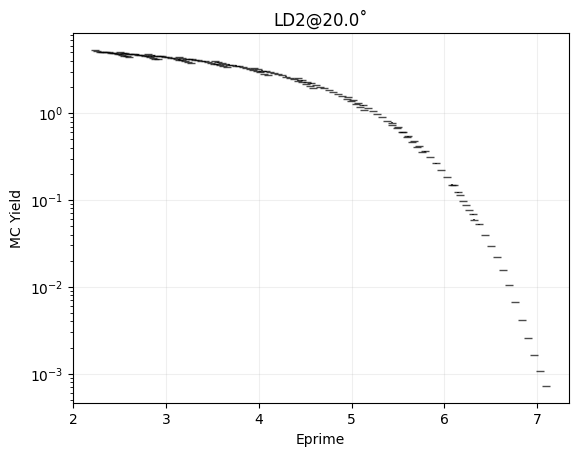

In [188]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_d2cryo22_hms.out")

ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # filepath = f"/Volumes/smriti/xem2/worksim/hms_mc_{dsimstring}_20degm{mom_str}.root"
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{dsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdelta", "hsytar", "hsyptar", "hsxptar", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdelta"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdelta"]) < 8) & \
            (np.abs(electrons["hsyptar"]) < 0.032) & \
            (np.abs(electrons["hsxptar"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    #Perform the delta correction
    electrons["hsdelta"] = (0.990337 * electrons["hsdelta"]) - 0.00236077 * (electrons["hsdelta"]**2) + 0.000286814 * (electrons["hsdelta"]**3) + 2.09878E-6 * (electrons["hsdelta"]**4) - 2.48674E-6 * (electrons["hsdelta"]**5) + 1.8646E-7 * (electrons["hsdelta"]**6)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdelta"][mc_cut]
    hsyptar_cut = electrons["hsyptar"][mc_cut]
    hsxptar_cut = electrons["hsxptar"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), 1.5)

    # print("Length of ytar_weight", len(ytar_weight))
    # print("Length of Eprime_dict", len(Eprime_dict[momentum]))
    
    # Calculate theta (in degrees)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)
    
    # Perform the interpolation
    points_dtg = np.array([V2, V3]).T #Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))  #Make a column stack of points to be interpolated for our given E' and theta
    xsec_array[momentum] = griddata(points_dtg, V9, points_to_interpolate, method = 'linear') #Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation

hsdelta_min = np.min(delta_dict[2.42])
hsdelta_max = np.max(delta_dict[2.42])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_num_bins = bin_per_mom
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, hsdelta_num_bins + 1)

bin_counts_eprime_2p42_dtg, bin_errors_eprime_2p42_dtg = mchist_from_array(delta_dict[2.42], xsec_array[2.42] * mc_scale[2.42] * ytar_weight[2.42] * jacobian_weight[2.42], hsdelta_binedges)
bin_counts_eprime_2p71_dtg, bin_errors_eprime_2p71_dtg = mchist_from_array(delta_dict[2.71], xsec_array[2.71] * mc_scale[2.71] * ytar_weight[2.71] * jacobian_weight[2.71], hsdelta_binedges)
bin_counts_eprime_3p04_dtg, bin_errors_eprime_3p04_dtg = mchist_from_array(delta_dict[3.04], xsec_array[3.04] * mc_scale[3.04] * ytar_weight[3.04] * jacobian_weight[3.04], hsdelta_binedges)
bin_counts_eprime_3p4_dtg, bin_errors_eprime_3p4_dtg = mchist_from_array(delta_dict[3.4], xsec_array[3.4] * mc_scale[3.4] * ytar_weight[3.4] * jacobian_weight[3.4], hsdelta_binedges)
bin_counts_eprime_3p81_dtg, bin_errors_eprime_3p81_dtg = mchist_from_array(delta_dict[3.81], xsec_array[3.81] * mc_scale[3.81] * ytar_weight[3.81] * jacobian_weight[3.81], hsdelta_binedges)
bin_counts_eprime_4p27_dtg, bin_errors_eprime_4p27_dtg = mchist_from_array(delta_dict[4.27], xsec_array[4.27] * mc_scale[4.27] * ytar_weight[4.27] * jacobian_weight[4.27], hsdelta_binedges)
bin_counts_eprime_4p78_dtg, bin_errors_eprime_4p78_dtg = mchist_from_array(delta_dict[4.78], xsec_array[4.78] * mc_scale[4.78] * ytar_weight[4.78] * jacobian_weight[4.78], hsdelta_binedges)
bin_counts_eprime_5p36_dtg, bin_errors_eprime_5p36_dtg = mchist_from_array(delta_dict[5.36], xsec_array[5.36] * mc_scale[5.36] * ytar_weight[5.36] * jacobian_weight[5.36], hsdelta_binedges)
bin_counts_eprime_5p878_dtg, bin_errors_eprime_5p878_dtg = mchist_from_array(delta_dict[5.878], xsec_array[5.878] * mc_scale[5.878] * ytar_weight[5.878] * jacobian_weight[5.878], hsdelta_binedges)
bin_counts_eprime_6p6_dtg, bin_errors_eprime_6p6_dtg = mchist_from_array(delta_dict[6.6], xsec_array[6.6] * mc_scale[6.6] * ytar_weight[6.6] * jacobian_weight[6.6], hsdelta_binedges)

fig4, ax4 = plt.subplots()
# Plotting the histogram with error bars
ax4.errorbar(binned_eprime_bin_centers_2p42, bin_counts_eprime_2p42_dtg, yerr = bin_errors_eprime_2p42_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p71, bin_counts_eprime_2p71_dtg, yerr = bin_errors_eprime_2p71_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p04, bin_counts_eprime_3p04_dtg, yerr = bin_errors_eprime_3p04_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.04 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p4, bin_counts_eprime_3p4_dtg, yerr = bin_errors_eprime_3p4_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.4 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p81, bin_counts_eprime_3p81_dtg, yerr = bin_errors_eprime_3p81_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.81 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p27, bin_counts_eprime_4p27_dtg, yerr = bin_errors_eprime_4p27_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.27 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p78, bin_counts_eprime_4p78_dtg, yerr = bin_errors_eprime_4p78_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.78 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p36, bin_counts_eprime_5p36_dtg, yerr = bin_errors_eprime_5p36_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.36 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p878, bin_counts_eprime_5p878_dtg, yerr = bin_errors_eprime_5p878_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.878 GeV')
ax4.errorbar(binned_eprime_bin_centers_6p6, bin_counts_eprime_6p6_dtg, yerr = bin_errors_eprime_6p6_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 6.6 GeV')
ax4.grid(alpha = 0.2)
ax4.set_xlabel('Eprime')
ax4.set_ylabel('MC Yield')
ax4.set_yscale('log')
# ax4.legend() 
ax4.set_title(f'{dtg}@{dang}˚')
# fig4.savefig(f'{folder}/eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

In [189]:
print(bin_counts_eprime_2p42_dtg)

[5.32208423 5.19399037 5.087925   5.06630774 5.03452431 5.03275617
 5.02743842 4.96033178 4.9381106  4.87961775 4.83334775 4.78633995
 4.66586336 4.58557223 4.52714531 4.42014968]


<h1 align="center">DATA/SIMULATION YIELD RATIO FOR DTG</h1>

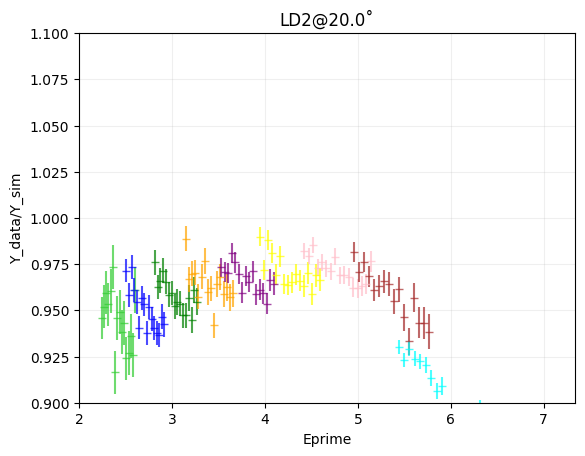

In [190]:
ratio_eprime_2p42_dtg = subtracted_bin_contents_2p42_dtg / bin_counts_eprime_2p42_dtg
ratio_eprime_2p71_dtg = subtracted_bin_contents_2p71_dtg / bin_counts_eprime_2p71_dtg
ratio_eprime_3p04_dtg = subtracted_bin_contents_3p04_dtg / bin_counts_eprime_3p04_dtg
ratio_eprime_3p4_dtg = subtracted_bin_contents_3p4_dtg / bin_counts_eprime_3p4_dtg
ratio_eprime_3p81_dtg = subtracted_bin_contents_3p81_dtg / bin_counts_eprime_3p81_dtg
ratio_eprime_4p27_dtg = subtracted_bin_contents_4p27_dtg / bin_counts_eprime_4p27_dtg
ratio_eprime_4p78_dtg = subtracted_bin_contents_4p78_dtg / bin_counts_eprime_4p78_dtg
ratio_eprime_5p36_dtg = subtracted_bin_contents_5p36_dtg / bin_counts_eprime_5p36_dtg
ratio_eprime_5p878_dtg = subtracted_bin_contents_5p878_dtg / bin_counts_eprime_5p878_dtg
ratio_eprime_6p6_dtg = subtracted_bin_contents_6p6_dtg / bin_counts_eprime_6p6_dtg

# Add errors in quadrature
ratio_errors_2p42_dtg = ratio_eprime_2p42_dtg * np.sqrt((subtracted_bin_errors_2p42_dtg / subtracted_bin_contents_2p42_dtg)**2 + (bin_errors_eprime_2p42_dtg / bin_counts_eprime_2p42_dtg)**2)
ratio_errors_2p71_dtg = ratio_eprime_2p71_dtg * np.sqrt((subtracted_bin_errors_2p71_dtg / subtracted_bin_contents_2p71_dtg)**2 + (bin_errors_eprime_2p71_dtg / bin_counts_eprime_2p71_dtg)**2)
ratio_errors_3p04_dtg = ratio_eprime_3p04_dtg * np.sqrt((subtracted_bin_errors_3p04_dtg / subtracted_bin_contents_3p04_dtg)**2 + (bin_errors_eprime_3p04_dtg / bin_counts_eprime_3p04_dtg)**2)
ratio_errors_3p4_dtg = ratio_eprime_3p4_dtg * np.sqrt((subtracted_bin_errors_3p4_dtg / subtracted_bin_contents_3p4_dtg)**2 + (bin_errors_eprime_3p4_dtg / bin_counts_eprime_3p4_dtg)**2)
ratio_errors_3p81_dtg = ratio_eprime_3p81_dtg * np.sqrt((subtracted_bin_errors_3p81_dtg / subtracted_bin_contents_3p81_dtg)**2 + (bin_errors_eprime_3p81_dtg / bin_counts_eprime_3p81_dtg)**2)
ratio_errors_4p27_dtg = ratio_eprime_4p27_dtg * np.sqrt((subtracted_bin_errors_4p27_dtg / subtracted_bin_contents_4p27_dtg)**2 + (bin_errors_eprime_4p27_dtg / bin_counts_eprime_4p27_dtg)**2)
ratio_errors_4p78_dtg = ratio_eprime_4p78_dtg * np.sqrt((subtracted_bin_errors_4p78_dtg / subtracted_bin_contents_4p78_dtg)**2 + (bin_errors_eprime_4p78_dtg / bin_counts_eprime_4p78_dtg)**2)
ratio_errors_5p36_dtg = ratio_eprime_5p36_dtg * np.sqrt((subtracted_bin_errors_5p36_dtg / subtracted_bin_contents_5p36_dtg)**2 + (bin_errors_eprime_5p36_dtg / bin_counts_eprime_5p36_dtg)**2)
ratio_errors_5p878_dtg = ratio_eprime_5p878_dtg * np.sqrt((subtracted_bin_errors_5p878_dtg / subtracted_bin_contents_5p878_dtg)**2 + (bin_errors_eprime_5p878_dtg / bin_counts_eprime_5p878_dtg)**2)
ratio_errors_6p6_dtg = ratio_eprime_6p6_dtg * np.sqrt((subtracted_bin_errors_6p6_dtg / subtracted_bin_contents_6p6_dtg)**2 + (bin_errors_eprime_6p6_dtg / bin_counts_eprime_6p6_dtg)**2)

fig5, ax5 = plt.subplots()
ax5.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_dtg, yerr = ratio_errors_2p42_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax5.errorbar(binned_eprime_bin_centers_2p71, ratio_eprime_2p71_dtg, yerr = ratio_errors_2p71_dtg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p04, ratio_eprime_3p04_dtg, yerr = ratio_errors_3p04_dtg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p4, ratio_eprime_3p4_dtg, yerr = ratio_errors_3p4_dtg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p81, ratio_eprime_3p81_dtg, yerr = ratio_errors_3p81_dtg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p27, ratio_eprime_4p27_dtg, yerr = ratio_errors_4p27_dtg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p78, ratio_eprime_4p78_dtg, yerr = ratio_errors_4p78_dtg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax5.errorbar(binned_eprime_bin_centers_5p36, ratio_eprime_5p36_dtg, yerr = ratio_errors_5p36_dtg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax5.errorbar(binned_eprime_bin_centers_5p878, ratio_eprime_5p878_dtg, yerr = ratio_errors_5p878_dtg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax5.errorbar(binned_eprime_bin_centers_6p6, ratio_eprime_6p6_dtg, yerr = ratio_errors_6p6_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax5.set_xlabel('Eprime')
ax5.set_ylabel('Y_data/Y_sim')
ax5.set_title(f'{dtg}@{dang}˚')
ax5.set_ylim(0.9, 1.1)
ax5.grid(alpha = 0.2)
# fig5.savefig(f'{folder}/ratio_eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR DTG</h1>

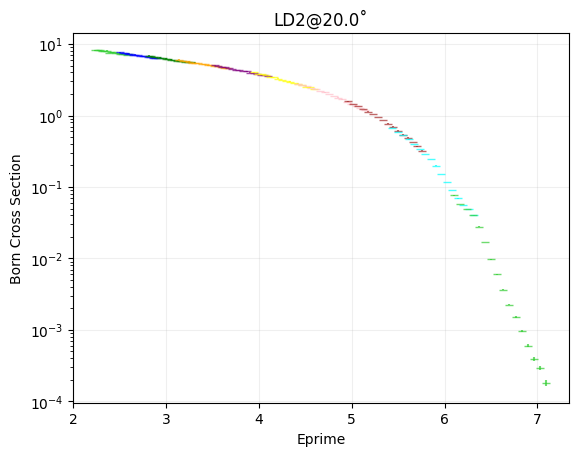

In [191]:
# Interpolate again to get model Born cross-section
born_xsec_array_2p42_dtg = griddata(points_dtg, V6, points_to_interpolate_2p42, method = 'linear')
born_xsec_array_2p71_dtg = griddata(points_dtg, V6, points_to_interpolate_2p71, method = 'linear')
born_xsec_array_3p04_dtg = griddata(points_dtg, V6, points_to_interpolate_3p04, method = 'linear')
born_xsec_array_3p4_dtg = griddata(points_dtg, V6, points_to_interpolate_3p4, method = 'linear')
born_xsec_array_3p81_dtg = griddata(points_dtg, V6, points_to_interpolate_3p81, method = 'linear')
born_xsec_array_4p27_dtg = griddata(points_dtg, V6, points_to_interpolate_4p27, method = 'linear')
born_xsec_array_4p78_dtg = griddata(points_dtg, V6, points_to_interpolate_4p78, method = 'linear')
born_xsec_array_5p36_dtg = griddata(points_dtg, V6, points_to_interpolate_5p36, method = 'linear')
born_xsec_array_5p878_dtg = griddata(points_dtg, V6, points_to_interpolate_5p878, method = 'linear')
born_xsec_array_6p6_dtg = griddata(points_dtg, V6, points_to_interpolate_6p6, method = 'linear')

# Get the QE piece
qe_array_2p42_dtg = griddata(points_dtg, V8, points_to_interpolate_2p42, method = 'linear')
qe_array_2p71_dtg = griddata(points_dtg, V8, points_to_interpolate_2p71, method = 'linear')
qe_array_3p04_dtg = griddata(points_dtg, V8, points_to_interpolate_3p04, method = 'linear')
qe_array_3p4_dtg = griddata(points_dtg, V8, points_to_interpolate_3p4, method = 'linear')
qe_array_3p81_dtg = griddata(points_dtg, V8, points_to_interpolate_3p81, method = 'linear')
qe_array_4p27_dtg = griddata(points_dtg, V8, points_to_interpolate_4p27, method = 'linear')
qe_array_4p78_dtg = griddata(points_dtg, V8, points_to_interpolate_4p78, method = 'linear')
qe_array_5p36_dtg = griddata(points_dtg, V8, points_to_interpolate_5p36, method = 'linear')
qe_array_5p878_dtg = griddata(points_dtg, V8, points_to_interpolate_5p878, method = 'linear')
qe_array_6p6_dtg = griddata(points_dtg, V8, points_to_interpolate_6p6, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_2p42_dtg = griddata(points_dtg, V13, points_to_interpolate_2p42, method = 'linear')
ccf_2p71_dtg = griddata(points_dtg, V13, points_to_interpolate_2p71, method = 'linear')
ccf_3p04_dtg = griddata(points_dtg, V13, points_to_interpolate_3p04, method = 'linear')
ccf_3p4_dtg = griddata(points_dtg, V13, points_to_interpolate_3p4, method = 'linear')
ccf_3p81_dtg = griddata(points_dtg, V13, points_to_interpolate_3p81, method = 'linear')
ccf_4p27_dtg = griddata(points_dtg, V13, points_to_interpolate_4p27, method = 'linear')
ccf_4p78_dtg = griddata(points_dtg, V13, points_to_interpolate_4p78, method = 'linear')
ccf_5p36_dtg = griddata(points_dtg, V13, points_to_interpolate_5p36, method = 'linear')
ccf_5p878_dtg = griddata(points_dtg, V13, points_to_interpolate_5p878, method = 'linear')
ccf_6p6_dtg = griddata(points_dtg, V13, points_to_interpolate_6p6, method = 'linear')

# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_2p42_dtg = ratio_eprime_2p42_dtg * born_xsec_array_2p42_dtg * ccf_2p42_dtg
born_cross_2p71_dtg = ratio_eprime_2p71_dtg * born_xsec_array_2p71_dtg * ccf_2p71_dtg
born_cross_3p04_dtg = ratio_eprime_3p04_dtg * born_xsec_array_3p04_dtg * ccf_3p04_dtg
born_cross_3p4_dtg = ratio_eprime_3p4_dtg * born_xsec_array_3p4_dtg * ccf_3p4_dtg
born_cross_3p81_dtg = ratio_eprime_3p81_dtg * born_xsec_array_3p81_dtg * ccf_3p81_dtg
born_cross_4p27_dtg = ratio_eprime_4p27_dtg * born_xsec_array_4p27_dtg * ccf_4p27_dtg
born_cross_4p78_dtg = ratio_eprime_4p78_dtg * born_xsec_array_4p78_dtg * ccf_4p78_dtg
born_cross_5p36_dtg = ratio_eprime_5p36_dtg * born_xsec_array_5p36_dtg * ccf_5p36_dtg
born_cross_5p878_dtg = ratio_eprime_5p878_dtg * born_xsec_array_5p878_dtg * ccf_5p878_dtg
born_cross_6p6_dtg = ratio_eprime_6p6_dtg * born_xsec_array_6p6_dtg * ccf_6p6_dtg

# Error propagation
born_errors_2p42_dtg = born_cross_2p42_dtg * ratio_errors_2p42_dtg
born_errors_2p71_dtg = born_cross_2p71_dtg * ratio_errors_2p71_dtg
born_errors_3p04_dtg = born_cross_3p04_dtg * ratio_errors_3p04_dtg
born_errors_3p4_dtg = born_cross_3p4_dtg * ratio_errors_3p4_dtg
born_errors_3p81_dtg = born_cross_3p81_dtg * ratio_errors_3p81_dtg
born_errors_4p27_dtg = born_cross_4p27_dtg * ratio_errors_4p27_dtg
born_errors_4p78_dtg = born_cross_4p78_dtg * ratio_errors_4p78_dtg
born_errors_5p36_dtg = born_cross_5p36_dtg * ratio_errors_5p36_dtg
born_errors_5p878_dtg = born_cross_5p878_dtg * ratio_errors_5p878_dtg
born_errors_6p6_dtg = born_cross_6p6_dtg * ratio_errors_6p6_dtg

fig6, ax6 = plt.subplots()
ax6.errorbar(binned_eprime_bin_centers_2p42, born_cross_2p42_dtg, yerr = born_errors_2p42_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax6.errorbar(binned_eprime_bin_centers_2p71, born_cross_2p71_dtg, yerr = born_errors_2p71_dtg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p04, born_cross_3p04_dtg, yerr = born_errors_3p04_dtg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p4, born_cross_3p4_dtg, yerr = born_errors_3p4_dtg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p81, born_cross_3p81_dtg, yerr = born_errors_3p81_dtg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p27, born_cross_4p27_dtg, yerr = born_errors_4p27_dtg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p78, born_cross_4p78_dtg, yerr = born_errors_4p78_dtg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax6.errorbar(binned_eprime_bin_centers_5p36, born_cross_5p36_dtg, yerr = born_errors_5p36_dtg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax6.errorbar(binned_eprime_bin_centers_5p878, born_cross_5p878_dtg, yerr = born_errors_5p878_dtg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax6.errorbar(binned_eprime_bin_centers_6p6, born_cross_6p6_dtg, yerr = born_errors_6p6_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax6.set_xlabel('Eprime')
ax6.set_ylabel('Born Cross Section')
ax6.set_title(f'{dtg}@{dang}˚')
ax6.set_yscale('log')
#ax6.legend()
ax6.grid(alpha = 0.2)
# fig6.savefig(f'{folder}/xsec_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">TAKING CROSS-SECTION RATIOS</h1>

Per-nucleon scaling factor: 6.0
slope -0.04312911397273175


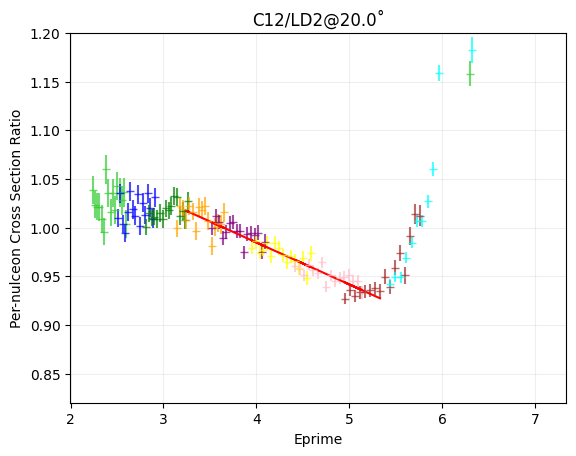

In [192]:
nA = target_info[ntg][1]
nZ = target_info[ntg][0]
dA = target_info[dtg][1]

sf = nA/dA
print("Per-nucleon scaling factor:", sf)

csr_2p42 = born_cross_2p42_ntg / born_cross_2p42_dtg / sf
csr_2p71 = born_cross_2p71_ntg / born_cross_2p71_dtg / sf
csr_3p04 = born_cross_3p04_ntg / born_cross_3p04_dtg / sf
csr_3p4 = born_cross_3p4_ntg / born_cross_3p4_dtg / sf
csr_3p81 = born_cross_3p81_ntg / born_cross_3p81_dtg / sf
csr_4p27 = born_cross_4p27_ntg / born_cross_4p27_dtg / sf
csr_4p78 = born_cross_4p78_ntg / born_cross_4p78_dtg / sf
csr_5p36 = born_cross_5p36_ntg / born_cross_5p36_dtg / sf
csr_5p878 = born_cross_5p878_ntg / born_cross_5p878_dtg / sf
csr_6p6 = born_cross_6p6_ntg / born_cross_6p6_dtg / sf

csr_errors_2p42 = csr_2p42 * np.sqrt((born_errors_2p42_ntg / born_cross_2p42_ntg)**2 + (born_errors_2p42_dtg / born_cross_2p42_dtg)**2)
csr_errors_2p71 = csr_2p71 * np.sqrt((born_errors_2p71_ntg / born_cross_2p71_ntg)**2 + (born_errors_2p71_dtg / born_cross_2p71_dtg)**2)
csr_errors_3p04 = csr_3p04 * np.sqrt((born_errors_3p04_ntg / born_cross_3p04_ntg)**2 + (born_errors_3p04_dtg / born_cross_3p04_dtg)**2)
csr_errors_3p4 = csr_3p4 * np.sqrt((born_errors_3p4_ntg / born_cross_3p4_ntg)**2 + (born_errors_3p4_dtg / born_cross_3p4_dtg)**2)
csr_errors_3p81 = csr_3p81 * np.sqrt((born_errors_3p81_ntg / born_cross_3p81_ntg)**2 + (born_errors_3p81_dtg / born_cross_3p81_dtg)**2)
csr_errors_4p27 = csr_4p27 * np.sqrt((born_errors_4p27_ntg / born_cross_4p27_ntg)**2 + (born_errors_4p27_dtg / born_cross_4p27_dtg)**2)
csr_errors_4p78 = csr_4p78 * np.sqrt((born_errors_4p78_ntg / born_cross_4p78_ntg)**2 + (born_errors_4p78_dtg / born_cross_4p78_dtg)**2)
csr_errors_5p36 = csr_5p36 * np.sqrt((born_errors_5p36_ntg / born_cross_5p36_ntg)**2 + (born_errors_5p36_dtg / born_cross_5p36_dtg)**2)
csr_errors_5p878 = csr_5p878 * np.sqrt((born_errors_5p878_ntg / born_cross_5p878_ntg)**2 + (born_errors_5p878_dtg / born_cross_5p878_dtg)**2)
csr_errors_6p6 = csr_6p6 * np.sqrt((born_errors_6p6_ntg / born_cross_6p6_ntg)**2 + (born_errors_6p6_dtg / born_cross_6p6_dtg)**2)

fig7, ax7 = plt.subplots()
ax7.errorbar(binned_eprime_bin_centers_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax7.errorbar(binned_eprime_bin_centers_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax7.errorbar(binned_eprime_bin_centers_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax7.errorbar(binned_eprime_bin_centers_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax7.errorbar(binned_eprime_bin_centers_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax7.set_xlabel('Eprime')
ax7.set_ylabel('Per-nulceon Cross Section Ratio')
ax7.set_title(f'{ntg}/{dtg}@{dang}˚')
ax7.grid(alpha = 0.2)
ax7.set_ylim(0.82, 1.2)
# ax7.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.0))

csr = np.concatenate((csr_2p42, csr_2p71, csr_3p04, csr_3p4, csr_3p81, csr_4p27, csr_4p78, csr_5p36, csr_5p878, csr_6p6))
bin_centers = np.concatenate((binned_eprime_bin_centers_2p42, binned_eprime_bin_centers_2p71, binned_eprime_bin_centers_3p04, binned_eprime_bin_centers_3p4, binned_eprime_bin_centers_3p81, binned_eprime_bin_centers_4p27, binned_eprime_bin_centers_4p78, binned_eprime_bin_centers_5p36, binned_eprime_bin_centers_5p878, binned_eprime_bin_centers_6p6))
mask = (bin_centers >= 3.23) & (bin_centers <= 5.36) & ~np.isnan(csr)
filtered_csr = csr[mask]
filtered_bin_centers = bin_centers[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("slope", slope)
# print("high point", slope * np.max(filtered_bin_centers) + intercept)
# print("low point", slope * np.min(filtered_bin_centers) + intercept)
ax7.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig7.savefig(f'{folder}/csr_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">Converting to Bjorken-x</h1>

absolute value of slope 0.23270091085331476
EMC Ratio at x = 0.3: 1.0132617185874093


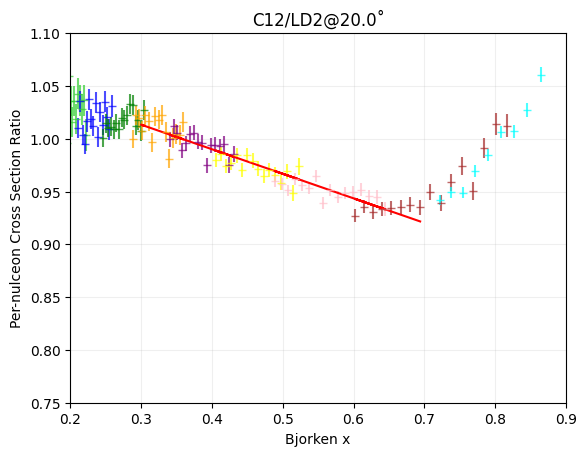

In [193]:
bin_centers_bjx_2p42 = (4 * Ei * binned_eprime_bin_centers_2p42 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p42))
bin_centers_bjx_2p71 = (4 * Ei * binned_eprime_bin_centers_2p71 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p71))
bin_centers_bjx_3p04 = (4 * Ei * binned_eprime_bin_centers_3p04 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p04))
bin_centers_bjx_3p4 = (4 * Ei * binned_eprime_bin_centers_3p4 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p4))
bin_centers_bjx_3p81 = (4 * Ei * binned_eprime_bin_centers_3p81 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p81))
bin_centers_bjx_4p27 = (4 * Ei * binned_eprime_bin_centers_4p27 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p27))
bin_centers_bjx_4p78 = (4 * Ei * binned_eprime_bin_centers_4p78 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p78))
bin_centers_bjx_5p36 = (4 * Ei * binned_eprime_bin_centers_5p36 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5p36))
bin_centers_bjx_5p878 = (4 * Ei * binned_eprime_bin_centers_5p878 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5p878))
bin_centers_bjx_6p6 = (4 * Ei * binned_eprime_bin_centers_6p6 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_6p6))

fig8, ax8 = plt.subplots()
ax8.errorbar(bin_centers_bjx_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax8.errorbar(bin_centers_bjx_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax8.errorbar(bin_centers_bjx_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax8.errorbar(bin_centers_bjx_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax8.errorbar(bin_centers_bjx_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax8.errorbar(bin_centers_bjx_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax8.errorbar(bin_centers_bjx_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax8.errorbar(bin_centers_bjx_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax8.errorbar(bin_centers_bjx_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax8.errorbar(bin_centers_bjx_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax8.set_xlabel('Bjorken x')
ax8.set_ylabel('Per-nulceon Cross Section Ratio')
ax8.set_title(f'{ntg}/{dtg}@{dang}˚')
ax8.set_ylim(0.75, 1.1)
ax8.set_xlim(0.2, 0.9)
ax8.grid(alpha = 0.2)

bjx_bin_centers = np.concatenate((bin_centers_bjx_2p42, bin_centers_bjx_2p71, bin_centers_bjx_3p04, bin_centers_bjx_3p4, bin_centers_bjx_3p81, bin_centers_bjx_4p27, bin_centers_bjx_4p78, bin_centers_bjx_5p36, bin_centers_bjx_5p878, bin_centers_bjx_6p6))
mask = (bjx_bin_centers >= 0.3) & (bjx_bin_centers <= 0.7) & ~np.isnan(csr)
filtered_bin_centers = bjx_bin_centers[mask]
filtered_csr = csr[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("absolute value of slope", abs(slope))
print("EMC Ratio at x = 0.3:", slope * np.min(filtered_bin_centers) + intercept)
_  = ax8.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig8.savefig(f'{folder}/emc_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

# Calculating isoscalar correction factor

In [194]:
all_eprime_bin_centers = np.concatenate((binned_eprime_bin_centers_2p42, binned_eprime_bin_centers_2p71, binned_eprime_bin_centers_3p04, binned_eprime_bin_centers_3p4, binned_eprime_bin_centers_3p81, binned_eprime_bin_centers_4p27, binned_eprime_bin_centers_4p78, binned_eprime_bin_centers_5p36, binned_eprime_bin_centers_5p878, binned_eprime_bin_centers_6p6))
all_bjx = np.concatenate((bin_centers_bjx_2p42, bin_centers_bjx_2p71, bin_centers_bjx_3p04, bin_centers_bjx_3p4, bin_centers_bjx_3p81, bin_centers_bjx_4p27, bin_centers_bjx_4p78, bin_centers_bjx_5p36, bin_centers_bjx_5p878, bin_centers_bjx_6p6))
isoscalar_all = np.zeros(len(all_eprime_bin_centers))
q2_all = 4 * Ei * all_eprime_bin_centers * (np.sin(dang * np.pi / 180 / 2))**2
print(f"The minimum and maximum Q^2 values are {np.min(q2_all):.2f} and {np.max(q2_all):.2f}")

for i in range(len(all_eprime_bin_centers)):
    isoscalar_all[i] = jra_nprat(all_bjx[i], q2_all[i])

print("Average of q2_all", np.mean(q2_all))
print("Average of Bjorken x", np.mean(all_bjx))
print("Length and average of isoscalar_all", len(isoscalar_all), np.mean(isoscalar_all))
# print(isoscalar_all)
# print("csr_2p42", csr_2p42)

The minimum and maximum Q^2 values are 2.85 and 9.02
Average of q2_all 5.37344441814154
Average of Bjorken x 0.5154917994149264
Length and average of isoscalar_all 160 0.5993635509065884


\begin{equation}
    \text{isoscalar all} = \frac{\sigma_n}{\sigma_p}
\end{equation}

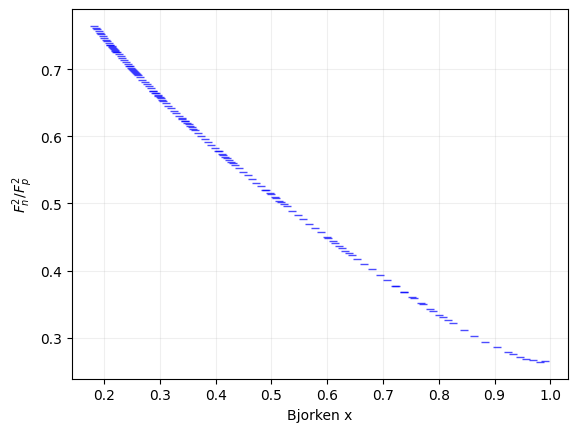

In [195]:
a = plt.plot(all_bjx[isoscalar_all != 1], isoscalar_all[isoscalar_all != 1], '_', alpha = 0.7, color = 'blue')
plt.xlabel('Bjorken x')
plt.ylabel(r'$F^2_n/F^2_p$')
plt.grid(alpha = 0.2)

# Calculating and Plotting the final Cross-Section Ratios

\begin{equation}
    \left( \frac{\sigma_A}{\sigma_D} \right)_{\text{ISO}} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right) \frac{\sigma_A}{\sigma_D},
\end{equation}

\begin{equation}
    \text{isoscalar factor} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right)
\end{equation}

nN 6
nZ 6
nA 12
Mean of isoscalar_factor 1.0


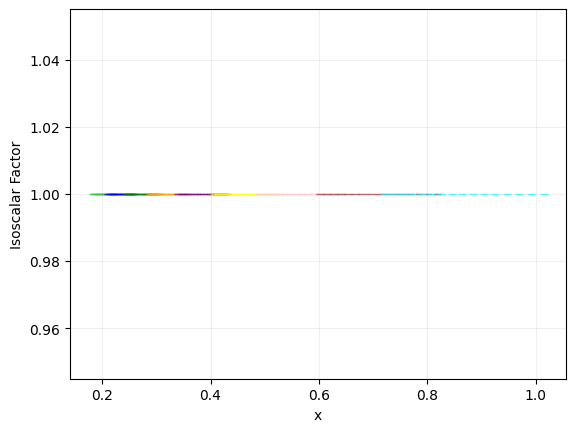

In [196]:
nN = nA - nZ
print("nN", nN)
print("nZ", nZ)
print("nA", nA)

isoscalar_factor = (nA/2 * (1 + isoscalar_all))/(nZ + (nN * isoscalar_all))
isoscalar_factor_2p42 = isoscalar_factor[0:len(binned_eprime_bin_centers_2p42)]
isoscalar_factor_2p71 = isoscalar_factor[len(binned_eprime_bin_centers_2p42):2 * len(binned_eprime_bin_centers_2p71)]
isoscalar_factor_3p04 = isoscalar_factor[2 * len(binned_eprime_bin_centers_2p71):3 * len(binned_eprime_bin_centers_3p04)]
isoscalar_factor_3p4 = isoscalar_factor[3 * len(binned_eprime_bin_centers_3p04):4 * len(binned_eprime_bin_centers_3p4)]
isoscalar_factor_3p81 = isoscalar_factor[4 * len(binned_eprime_bin_centers_3p4):5 * len(binned_eprime_bin_centers_3p81)]
isoscalar_factor_4p27 = isoscalar_factor[5 * len(binned_eprime_bin_centers_3p81):6 * len(binned_eprime_bin_centers_4p27)]
isoscalar_factor_4p78 = isoscalar_factor[6 * len(binned_eprime_bin_centers_4p27):7 * len(binned_eprime_bin_centers_4p78)]
isoscalar_factor_5p36 = isoscalar_factor[7 * len(binned_eprime_bin_centers_4p78):8 * len(binned_eprime_bin_centers_5p36)]
isoscalar_factor_5p878 = isoscalar_factor[8 * len(binned_eprime_bin_centers_5p36):9 * len(binned_eprime_bin_centers_5p878)]
isoscalar_factor_6p6 = isoscalar_factor[9 * len(binned_eprime_bin_centers_5p878):10 * len(binned_eprime_bin_centers_6p6)]
print("Mean of isoscalar_factor", np.mean(isoscalar_factor))

plt.plot(bin_centers_bjx_2p42, isoscalar_factor_2p42, '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
plt.plot(bin_centers_bjx_2p71, isoscalar_factor_2p71, '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
plt.plot(bin_centers_bjx_3p04, isoscalar_factor_3p04, '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
plt.plot(bin_centers_bjx_3p4, isoscalar_factor_3p4, '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
plt.plot(bin_centers_bjx_3p81, isoscalar_factor_3p81, '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
plt.plot(bin_centers_bjx_4p27, isoscalar_factor_4p27, '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
plt.plot(bin_centers_bjx_4p78, isoscalar_factor_4p78, '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
plt.plot(bin_centers_bjx_5p36, isoscalar_factor_5p36, '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
plt.plot(bin_centers_bjx_5p878, isoscalar_factor_5p878, '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
plt.grid(alpha = 0.2)
plt.xlabel('x')
_ = plt.ylabel('Isoscalar Factor')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


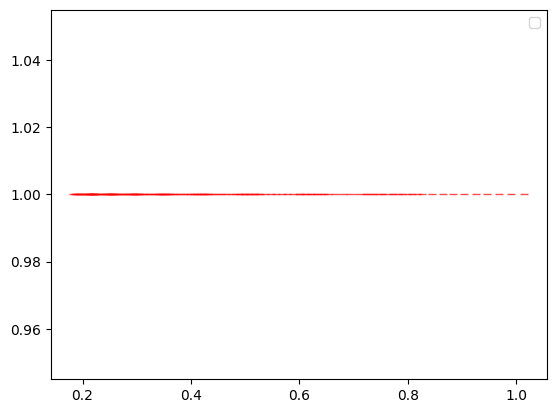

In [197]:
# Apply isoscalar correction to cross-section ratios
iso_csr_2p42 = csr_2p42 * isoscalar_factor_2p42
iso_csr_2p71 = csr_2p71 * isoscalar_factor_2p71
iso_csr_3p04 = csr_3p04 * isoscalar_factor_3p04
iso_csr_3p4 = csr_3p4 * isoscalar_factor_3p4
iso_csr_3p81 = csr_3p81 * isoscalar_factor_3p81
iso_csr_4p27 = csr_4p27 * isoscalar_factor_4p27
iso_csr_4p78 = csr_4p78 * isoscalar_factor_4p78
iso_csr_5p36 = csr_5p36 * isoscalar_factor_5p36
iso_csr_5p878 = csr_5p878 * isoscalar_factor_5p878
iso_csr_6p6 = csr_6p6 * isoscalar_factor_6p6

plt.plot(bin_centers_bjx_2p42, isoscalar_factor_2p42, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_2p71, isoscalar_factor_2p71, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_3p04, isoscalar_factor_3p04, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_3p4, isoscalar_factor_3p4, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_3p81, isoscalar_factor_3p81, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_4p27, isoscalar_factor_4p27, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_4p78, isoscalar_factor_4p78, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_5p36, isoscalar_factor_5p36, '_', alpha = 0.7, color = 'red')
plt.plot(bin_centers_bjx_5p878, isoscalar_factor_5p878, '_', alpha = 0.7, color = 'red')

# plt.plot(bin_centers_bjx_2p42, csr_2p42, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_2p71, csr_2p71, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_3p4, csr_3p4, '_',  alpha = 0.7, color = 'blue', label = 'Without Isoscalar Correction')
# plt.plot(bin_centers_bjx_3p81, csr_3p81, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_4p27, csr_4p27, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_4p78, csr_4p78, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_5p36, csr_5p36, '_', alpha = 0.7, color = 'blue')
# plt.plot(bin_centers_bjx_5p878, csr_5p878, '_', alpha = 0.7, color = 'blue')
plt.legend()

absolute value of isoscalar corrected slope 0.23270091085331485
Error on slope 0.00950827256916542
EMC Ratio at x = 0.3: 1.0132617185874093


Text(0.4, 0.79, 'Isoscalar corrected slope: 0.2327$\\pm$0.0095 \nEMC Ratio at x = 0.3: 1.0133')

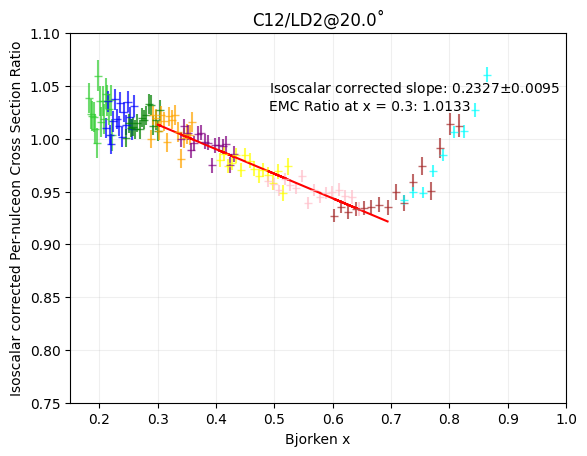

In [198]:
fig9, ax9 = plt.subplots()
ax9.errorbar(bin_centers_bjx_2p42, iso_csr_2p42, yerr = isoscalar_factor_2p42 * csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax9.errorbar(bin_centers_bjx_2p71, iso_csr_2p71, yerr = isoscalar_factor_2p71 * csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax9.errorbar(bin_centers_bjx_3p04, iso_csr_3p04, yerr = isoscalar_factor_3p04 * csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax9.errorbar(bin_centers_bjx_3p4, iso_csr_3p4, yerr = isoscalar_factor_3p4 * csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax9.errorbar(bin_centers_bjx_3p81, iso_csr_3p81, yerr = isoscalar_factor_3p81 * csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax9.errorbar(bin_centers_bjx_4p27, iso_csr_4p27, yerr = isoscalar_factor_4p27 * csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax9.errorbar(bin_centers_bjx_4p78, iso_csr_4p78, yerr = isoscalar_factor_4p78 * csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax9.errorbar(bin_centers_bjx_5p36, iso_csr_5p36, yerr = isoscalar_factor_5p36 * csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax9.errorbar(bin_centers_bjx_5p878, iso_csr_5p878, yerr = isoscalar_factor_5p878 * csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax9.errorbar(bin_centers_bjx_6p6, iso_csr_6p6, yerr = isoscalar_factor_6p6 * csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')

# ax9.errorbar(bin_centers_bjx_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '*', color = 'black')
# ax9.errorbar(bin_centers_bjx_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '*', color = 'black')

ax9.set_xlabel('Bjorken x')
ax9.set_ylabel('Isoscalar corrected Per-nulceon Cross Section Ratio')
ax9.set_title(f'{ntg}/{dtg}@{dang}˚')
ax9.grid(alpha = 0.2)
# ax9.legend()

iso_csr = np.concatenate((iso_csr_2p42, iso_csr_2p71, iso_csr_3p04, iso_csr_3p4, iso_csr_3p81, iso_csr_4p27, iso_csr_4p78, iso_csr_5p36, iso_csr_5p878, iso_csr_6p6))
filtered_iso_csr = iso_csr[mask]

iso_slope, iso_intercept, iso_r_value, iso_p_value, iso_std_err = stats.linregress(filtered_bin_centers, filtered_iso_csr)
print("absolute value of isoscalar corrected slope", abs(iso_slope))
norm_3 = iso_slope * np.min(filtered_bin_centers) + iso_intercept
print("Error on slope", iso_std_err)
print("EMC Ratio at x = 0.3:", norm_3)
ax9.plot(filtered_bin_centers, iso_slope * filtered_bin_centers + iso_intercept, 'r')
ax9.set_ylim(0.75, 1.1)
ax9.set_xlim(0.15, 1.0)
ax9.text(0.4, 0.79, f'Isoscalar corrected slope: {abs(iso_slope):.4f}$\pm${iso_std_err:.4f} \nEMC Ratio at x = 0.3: {norm_3:.4f}', transform = ax9.transAxes)
# fig9.savefig(f'{folder}/isoscalarcorrected_emc_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

In [199]:
minutes = (time.time() - start_time) / 60
print(f"Time taken: {minutes:.2f} minutes")

Time taken: 3.93 minutes
